![Agriculture Banner](Images/agriculture.jpg)

# Global Crop Yield Prediction Using Machine Learning

## Overview

Crop yield plays a critical role in food security, farmer income, and agricultural planning. In this project, I use real-world agricultural data from multiple countries and crops to build a machine learning model that predicts crop yield based on environmental and input features.

The goal is to uncover patterns and key factors that drive higher yield, so stakeholders can make better decisions about crop selection, resource allocation, and sustainability.
 

## Business Problem

Every year, the global population continues to rise but available agricultural land is shrinking. This creates a fundamental challenge for the future of food production. We have two options:

- Expand farmland (which is increasingly limited, costly, and environmentally unsustainable), or  
- **Increase crop yield from existing land** a more realistic and scalable path forward.

**Growers** already bring years of hands-on experience to their fields, using local knowledge and growing practices to optimize outcomes. **Agronomists and field advisors** provide technical guidance to help improve crop health and efficiency.**Plant breeding companies** focus on developing high-yield varieties, and have made major progress over the past decades. Meanwhile, **fertilizer and crop protection companies** continuously work on better inputs to support healthier, higher-yielding crops.

At a global level, **international organizations and researchers** are deeply focused on food security, especially as the world faces climate variability, supply disruptions, and economic instability. Reliable, data-driven insights into crop yield drivers are essential for building resilient food systems.

This project may not provide highly localized recommendations for a single grower, but it can offer **valuable high-level insights and comparisons** across crops, countries, and years. For **policy makers, researchers, NGOs, and global institutions**, this analysis helps uncover the environmental and input-related factors that most influence agricultural productivity.

Farmers, policymakers, and international organizations often rely on historical averages or intuition to estimate crop productivity. But yield is influenced by many factors like rainfall, temperature,variety choice and pesticide use etc. and these relationships are often complex.

My goal is to build a predictive model that estimates expected crop yield using environmental and input data. This model can help identify what conditions lead to higher yield, and guide decisions around crop planning and agricultural investments.


#### Key Questions

These are the main questions I aim to answer in this project:

- What are the most important factors influencing crop yield?
- How do weather and input levels (e.g., pesticide use) affect yield?
- How can we estimate crop yield in a specific country, crop, and year based on these inputs?

The answers will help stakeholders make smarter decisions to improve productivity and reduce risk.


#### Stakeholders & Goals

The main stakeholders for this project include:

- **Farmers and growers**, who want to maximize yield and income
- **Ag-tech companies**, building predictive tools to support data-driven farming
- **Agronomists and field advisors**, who guide growers on crop choices and input usage 
- **Government agriculture departments**, who support regional crop planning and food policy
- **International organizations** (e.g., FAO, CGIAR), who monitor food security and climate impacts
- **Researchers and NGOs**, interested in understanding input–output relationships in agriculture


The goal is to provide a model and insights that can help these groups understand what drives yield and how to improve it using data.


## Data Understanding

In this step, I’ll start exploring the dataset to understand its structure, size, and content.  
I’ll look at column names, data types, and sample rows.  
Then I’ll check for missing values, outliers, and any data quality issues that need to be cleaned before analysis.

The goal is to get familiar with the data, understand each feature, and figure out which columns might help answer my key questions.
This understanding will guide how I prepare, visualize, and model the data to uncover patterns in accident frequency and severity.

In [289]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [15]:
# Load the data
yield_df = pd.read_csv('Data/yield_df.csv')

# Basic inspection
print("Dataset shape:", yield_df.shape)

# Show basic info about the dataset
yield_df.info()

# Preview first few rows
yield_df.head()

Dataset shape: (28242, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [16]:
#Checking for null values 
yield_df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [17]:
#Basic statistic for numeric features 
yield_df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [21]:
#Checking dublicate values 
yield_df.duplicated().sum()

0

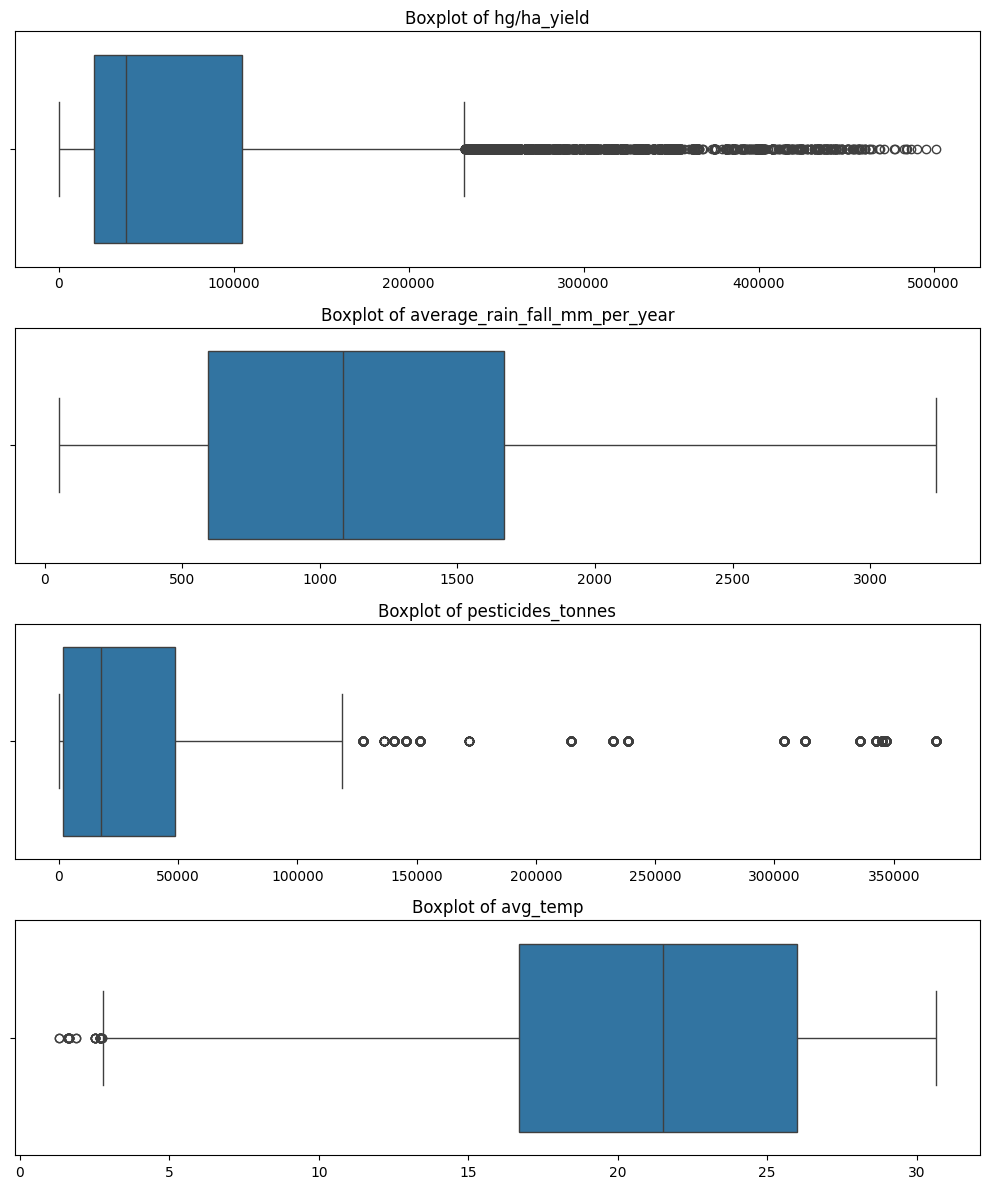

In [26]:
# List of numeric columns to visualize
num_features = [
    'hg/ha_yield',
    'average_rain_fall_mm_per_year',
    'pesticides_tonnes',
    'avg_temp'
]

# Set up the figure size
plt.figure(figsize=(10, 12))

# Loop through each feature and plot its boxplot in a subplot
for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features), 1, i)
    sns.boxplot(x=yield_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel("")  # Optional: remove x-axis label to keep it clean

plt.tight_layout()
plt.show()

##### Boxplot Summary of Numeric Features

The boxplots above reveal the distribution and potential outliers in key numeric features:

- **hg/ha_yield** shows a wide range with many high-end outliers, indicating some crops or regions produce significantly more than others.
- **average_rain_fall_mm_per_year** is fairly evenly spread, but a few regions receive exceptionally high rainfall.
- **pesticides_tonnes** is highly skewed, with a small number of countries using disproportionately large amounts.
- **avg_temp** is mostly centered between 15°C and 30°C, with a few colder observations on the lower end.

These insights suggest that some features may benefit from transformations (e.g., log scale) before modeling.


#### Data Understanding Summary

After exploring the dataset, here's what I found:

- The dataset contains **28,242 records** and **7 relevant columns**.
- There are **no missing values** in any of the key features, which is helpful for modeling.
- No duplicate rows were found.
- Some features (e.g., pesticides_tonnes, hg/ha_yield) have **very large ranges**, probably potential outliers or skewed distributions that may need transformation or further investigation.
- The dataset covers the period from **1990 to 2013**, covering **multiple crops** and **countries**, which gives good variability for machine learning.

Below is a summary of the key columns and their relevance:

##### Feature Dictionary

| Column                          | Description                                               | Relevance                                                                 |
|----------------------------------|------------------------------------------------------------|---------------------------------------------------------------------------|
| **Area**                           | Country or region name                                    | Used for geographic comparisons in yield                                 |
| **Item**                           | Crop name (e.g., Wheat, Rice, Maize)                      | Critical for crop-specific analysis and modeling                         |
| **Year**                           | Year of the observation                                   | Allows trend analysis and temporal modeling                              |
| **hg/ha_yield**                    | Crop yield measured in **hectograms per hectare** (1 hg = 100 g, 1 ha = 10,000 m²). For example, 50,000 hg/ha equals 5 tons per hectare. | **Target variable** representing crop productivity to be predicted. |
| **average_rain_fall_mm_per_year** | Average annual rainfall (mm)                              | Environmental factor that strongly affects yield                         |
| **pesticides_tonnes**             | Annual pesticide use (tonnes)                             | Input variable potentially influencing crop performance                  |
| **avg_temp**                       | Average annual temperature (°C)                           | Another key environmental factor affecting plant growth and productivity |

These variables will be used for feature engineering, exploratory data analysis, and model training in the next steps.


## Data Preparation

In this step, I’ll clean and organize the dataset to make it ready for analysis.

Key tasks include:
- Checking and fixing any outliers or unusual values
- Adjusting data types if needed
- Extracting new features (e.g., combining or transforming existing columns)

The goal is to ensure the data is consistent and useful for answering my key questions in the next steps.


In [35]:
#Backup dataset just in case 
df=yield_df.copy()

In [36]:
#Drop the Unnamed: 0 column
yield_df.drop(columns=['Unnamed: 0'], inplace=True)

In [38]:
# Convert yield from hectograms per hectare to tons per hectare
# 1 ton = 10,000 hectograms
yield_df['tons_per_ha'] = yield_df['hg/ha_yield'] / 10000

# Preview the updated DataFrame to confirm the new column
yield_df[['hg/ha_yield', 'tons_per_ha']].head()

,hg/ha_yield,tons_per_ha
0,36613,3.6613
1,66667,6.6667
2,23333,2.3333
3,12500,1.2500
4,7000,0.7000


**Yield Unit Conversion**

The original hg/ha_yield column represents crop yield in hectograms per hectare, which is harder to interpret.

To make the values more meaningful and easier to compare, I converted it to tons per hectare. 

This new column **tons_per_ha** is now clearer for analysis and aligns with common agricultural reporting standards.


In [ ]:
#checking the unique values in item column 
yield_df['Item'].value_counts()

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [42]:
#checking the unique values in Area column 
yield_df['Area'].value_counts()

Area
India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Japan          966
              ... 
Estonia         42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: count, Length: 101, dtype: int64

In [43]:
#checking the unique values in Year column 
yield_df['Year'].value_counts()

Year
2012    1260
2013    1259
2011    1245
2010    1245
2008    1244
2006    1243
2009    1242
2007    1242
2005    1235
2004    1234
2000    1230
2001    1229
2002    1228
1998    1224
1997    1224
1999    1223
1993    1223
1996    1222
1995    1222
1994    1221
1992    1219
1991    1164
1990    1164
Name: count, dtype: int64

In [45]:
#Creating the pesticide intensity feature from dataset 
yield_df['pesticide_intensity']=yield_df['pesticides_tonnes'] / yield_df['tons_per_ha']

#Creating the rainfall_per_ton feature 
yield_df['rainfall_per_ton']=yield_df['average_rain_fall_mm_per_year'] / yield_df['tons_per_ha']

# Creating the yield_efficiency_ratio feature
yield_df['yield_efficiency_ratio']=yield_df['tons_per_ha'] / yield_df['pesticides_tonnes']

# Creating the yield_vs_avg_temp feature
yield_df['yield_vs_avg_temp']=yield_df['tons_per_ha'] * yield_df['avg_temp']

# Creating the log_pesticides feature
yield_df['log_pesticides'] = np.log1p(yield_df['pesticides_tonnes'])

# Creating the log_rainfall feature
yield_df['log_rainfall'] = np.log1p(yield_df['average_rain_fall_mm_per_year'])

##### Feature Engineering Summary

To help the model capture more meaningful patterns, I created several new features based on domain knowledge and ratio-based relationships:

| Feature Name           | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| **pesticide_intensity**  | Pesticide use per ton of yield , measures chemical input required per output unit. |
| **rainfall_per_ton**     | Annual rainfall per ton of yield, helps assess water efficiency.           |
| **yield_efficiency_ratio** | Tons of yield per ton of pesticide used, reverse view of intensity.         |
| **yield_vs_avg_temp**    | Product of yield and temperature, explores potential interaction effects.   |
| **log_pesticides**       | Log-transformed pesticide values, reduces skew and stabilizes variance.    |
| **log_rainfall**         | Log-transformed rainfall, helps normalize highly skewed distributions.     |

These engineered features may reveal non-linear relationships or efficiency dynamics that raw variables alone might miss.


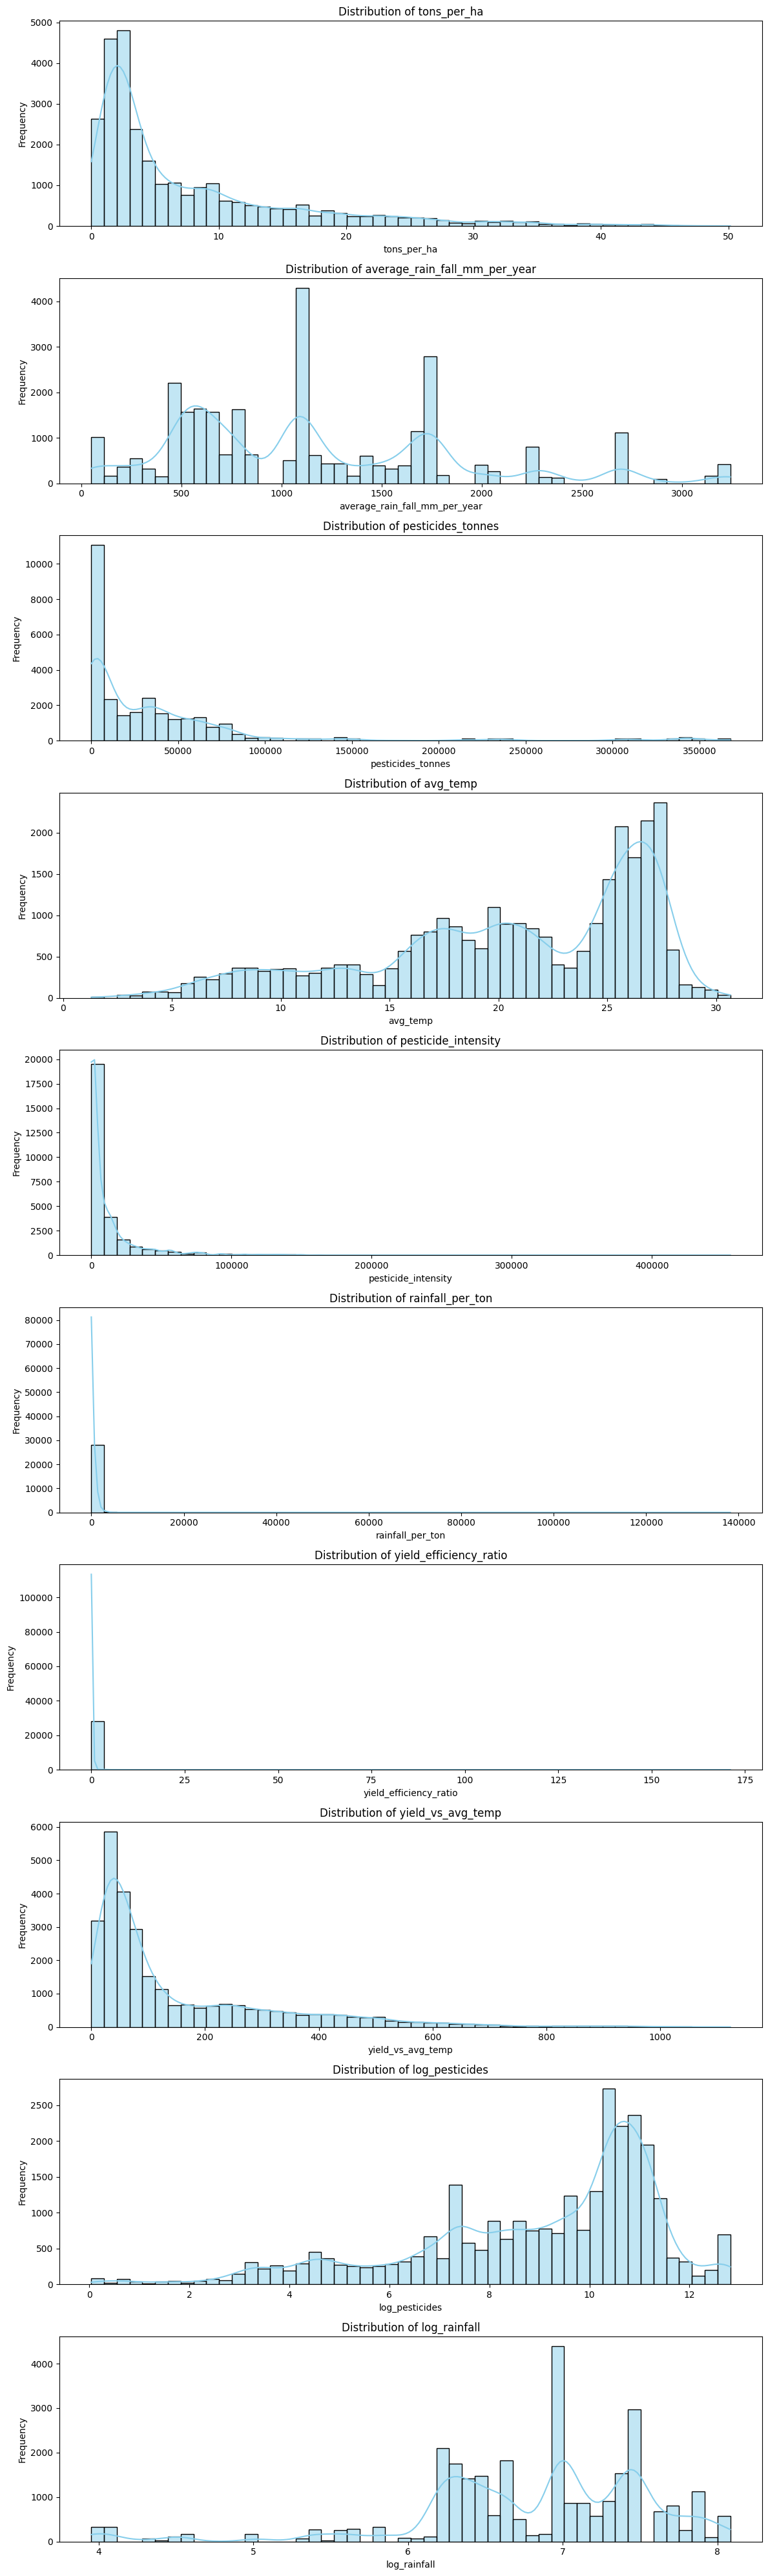

In [ ]:
#Creating a function to see  data distribution in numeric features 
def plot_numeric_distributions(df, num_features, bins=50):
    '''
    Plots histograms for a list of numeric features.
    
    Parameters:
        df (DataFrame): The dataset.
        num_features (list): List of numeric column names.
        bins (int): Number of bins for histograms.
    '''
    n = len(num_features)
    plt.figure(figsize=(12, 4 * n))
    
    #Loop through numeric features to create plots
    for i, col in enumerate(num_features, 1):
        plt.subplot(n, 1, i)
        sns.histplot(df[col], bins=bins, kde=True, color='skyblue')
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()

    plt.show()

#Collecting numeric features
num_cols = [
    'tons_per_ha', 
    'average_rain_fall_mm_per_year',
    'pesticides_tonnes', 
    'avg_temp',
    'pesticide_intensity',
    'rainfall_per_ton',
    'yield_efficiency_ratio',
    'yield_vs_avg_temp',
    'log_pesticides',
    'log_rainfall']

#Plot the numeric features
plot_numeric_distributions(yield_df, num_cols)

The histograms above show that many numeric features are right-skewed, with a long tail of high values. This includes variables like yield, pesticide use, and rainfall. To better handle these distributions and reduce the influence of extreme outliers, I applied log transformations where appropriate. This helps improve interpretability and prepares the data for modeling.

In [56]:
#Checking the dataset after new features 
yield_df.head()


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,tons_per_ha,pesticide_intensity,rainfall_per_ton,yield_efficiency_ratio,yield_vs_avg_temp,log_pesticides,log_rainfall
0,Albania,Maize,1990,36613,1485.0,121.0,16.37,3.6613,33.048371,405.593642,0.030259,59.935481,4.804021,7.303843
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,6.6667,18.149909,222.748886,0.055097,109.133879,4.804021,7.303843
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,2.3333,51.857884,636.437663,0.019283,38.196121,4.804021,7.303843
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,1.2500,96.800000,1188.000000,0.010331,20.462500,4.804021,7.303843
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,0.7000,172.857143,2121.428571,0.005785,11.459000,4.804021,7.303843


In [55]:
#Checking the dataset after new features 
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,tons_per_ha,pesticide_intensity,rainfall_per_ton,yield_efficiency_ratio,yield_vs_avg_temp,log_pesticides,log_rainfall
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627,7.705333,10999.909441,447.981070,0.129925,152.133081,8.973509,6.809437
std,7.051905,84956.612897,709.81215,59958.784665,6.312051,8.495661,20423.062662,1394.950402,2.590952,171.009577,2.473959,0.788565
min,1990.000000,50.000000,51.00000,0.040000,1.300000,0.005000,0.005846,1.514337,0.000002,0.039500,0.039221,3.951244
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500,1.991925,427.880976,90.756153,0.000081,36.731594,7.440147,6.386879
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000,3.829500,2699.355346,218.340611,0.000370,73.421121,9.771694,6.988413
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000,10.467675,12415.488649,567.188391,0.002337,223.872720,10.793206,7.419980
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000,50.141200,456000.000000,138200.000000,171.052500,1123.059892,12.815237,8.083637


#### Data Preparation Summary

In this step, I cleaned and transformed the dataset to prepare it for analysis and modeling. I removed unnecessary columns, converted yield values to a more interpretable scale (tons per hectare), and engineered several new features to capture relationships between inputs and yield.

I applied log transformations to highly skewed features to reduce the impact of extreme values and support more stable model performance. I also visualized distributions to better understand the spread and presence of outliers in numeric variables.

These transformations will support stronger analysis and more reliable modeling in the next steps.



### Exploratory Data Analysis (EDA)

In this step, I explore the data to uncover patterns, trends, and relationships between variables. 
The goal is to better understand how environmental factors, crop types, and regions relate to yield before moving into modeling.


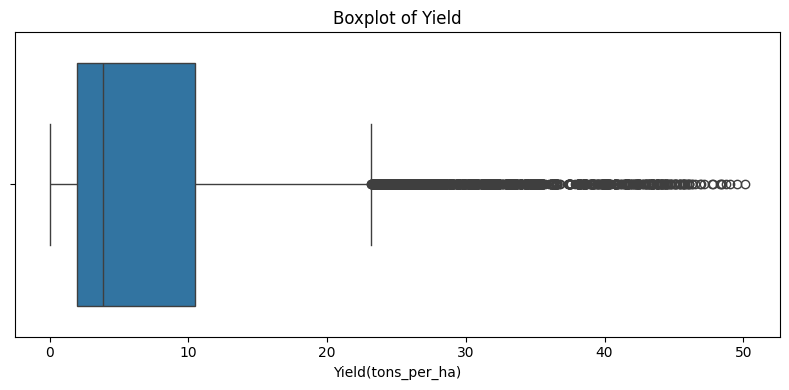

In [ ]:
#Boxplot of yield value to see outliers 
plt.figure(figsize=(8,4))
sns.boxplot(data=yield_df, x='tons_per_ha')
plt.title("Boxplot of Yield")
plt.xlabel("Yield(tons_per_ha)")
plt.tight_layout()
plt.show()

The boxplot of yield reveals a large number of high-value outliers. Most yields fall below 20 tons per hectare, with a long tail extending beyond that range.


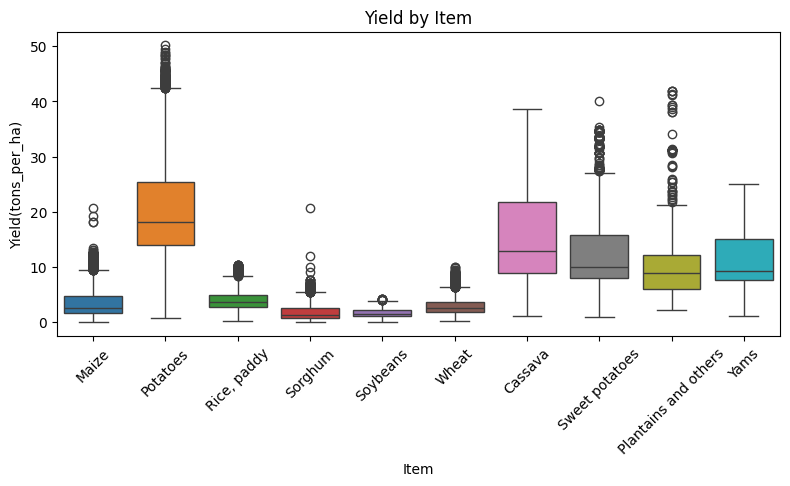

In [209]:
#Boxplot of yield by Item
plt.figure(figsize=(8,4))
sns.boxplot(data=yield_df, y='tons_per_ha', x='Item',hue='Item', legend=False )
plt.title('Yield by Item')
plt.xlabel('Item')
plt.ylabel('Yield(tons_per_ha)')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

This boxplot shows the distribution of crop yields for each item in the dataset.
- Potatoes, sweet potatoes, and cassava exhibit the highest median yields.
- Sorghum and soybeans tend to have lower yields overall.

Several crop types show a wide spread and many outliers, meaning significant variation across regions and growing conditions.

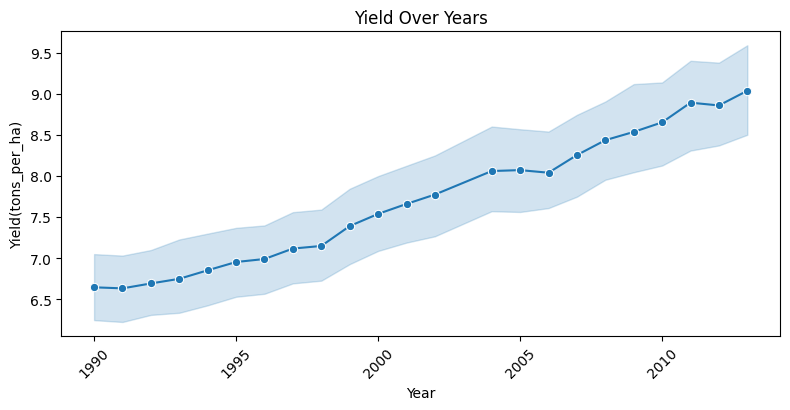

In [164]:
#Lineplot of yield over years
plt.figure(figsize=(8,4))
sns.lineplot(data=yield_df, y='tons_per_ha', x='Year', marker='o', linestyle='-')
plt.title('Yield Over Years')
plt.xlabel('Year')
plt.ylabel('Yield(tons_per_ha)')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


This line plot shows the average crop yield over time.  
There is a clear upward trend, indicating improvements in agricultural productivity between 1990 and 2013.

The shaded area around the line represents the 95% confidence interval for the mean yield at each year.  
Wider intervals suggest more variability in the data for that year, while narrower intervals indicate more consistent values.


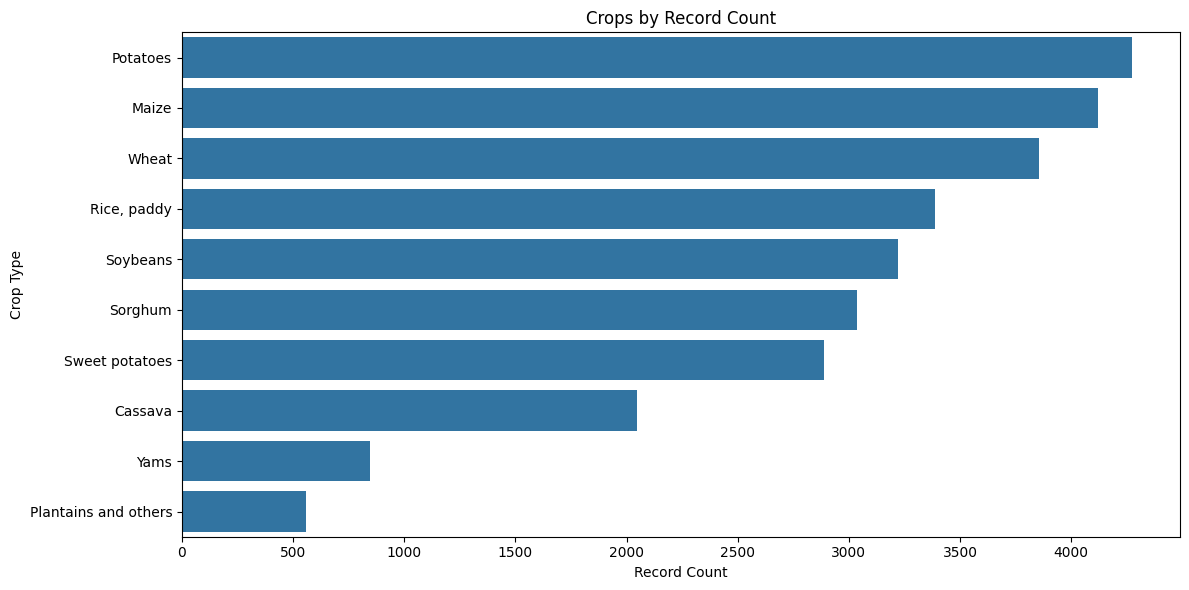

In [110]:
# Count occurrences of each crop
item_counts = yield_df['Item'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts.values, y=item_counts.index)

plt.title('Crops by Record Count')
plt.xlabel('Record Count')
plt.ylabel('Crop Type')
plt.tight_layout()
plt.show()

This dataset covers 10 crops and bar chart above shows the number of records available for each crop type in the dataset. Potatoes, maize, and wheat are the most frequently represented crops, indicating they may have stronger influence in analysis and modeling.


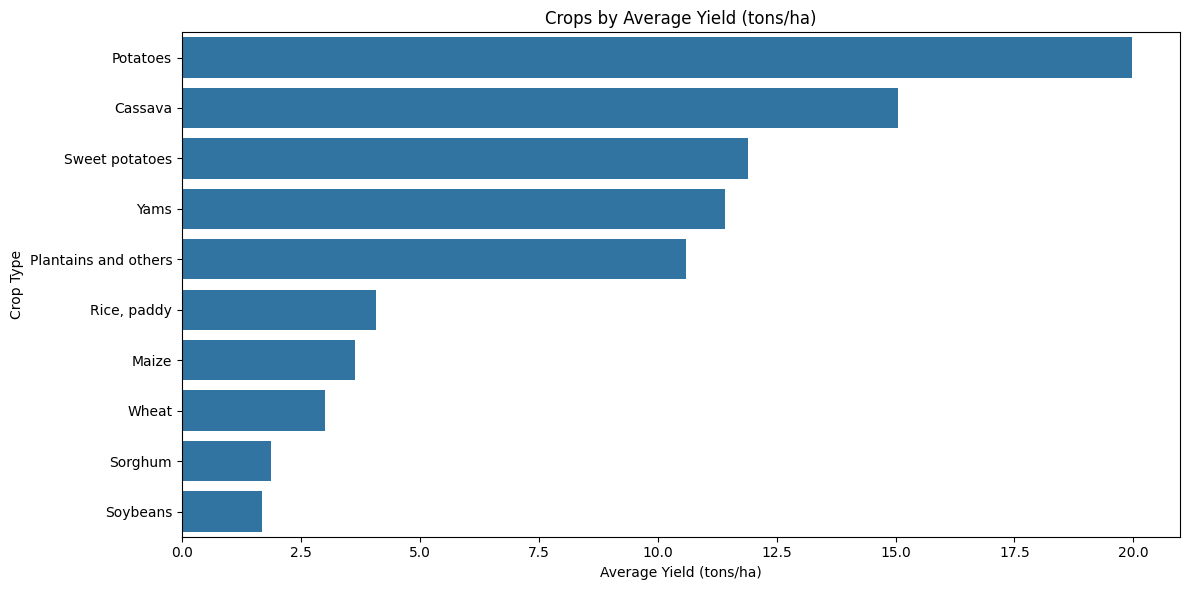

In [114]:
# Average yield by crop 
avg_yields = yield_df.groupby('Item')['tons_per_ha'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_yields.values, y=avg_yields.index)

plt.title('Crops by Average Yield (tons/ha)')
plt.xlabel('Average Yield (tons/ha)')
plt.ylabel('Crop Type')
plt.tight_layout()
plt.show()

This bar chart shows the average yield per hectare for each crop. Potatoes, cassava, and sweet potatoes show the highest average yields, while soybeans and sorghum have the lowest. These differences can help prioritize crops in yield improvement strategies.


In [144]:
#Checking the Areas in the dataset(to see if US is included)
yield_df['Area'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola



The dataset includes agricultural data from a wide range of countries across all continents. However, it is important to note that the **United States is not present** in this dataset. As a result, comparisons involving global agricultural trends or top producers should be interpreted with this limitation in mind.


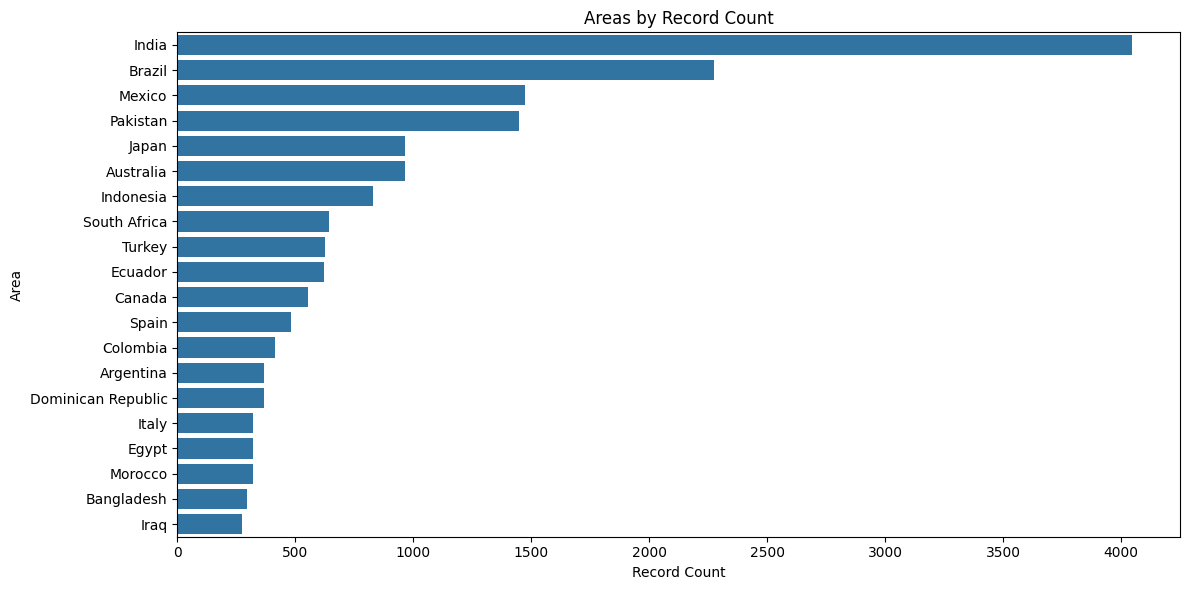

In [ ]:
# Count occurrences of each Country Top 20
Area_counts = yield_df['Area'].value_counts().head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=Area_counts.values, y=Area_counts.index)

plt.title('Top 20 Areas by Record Count')
plt.xlabel('Record Count')
plt.ylabel('Area')
plt.tight_layout()
plt.show()

This bar chart shows the top 20 countries in the dataset based on the number of records available.
Countries like India, Brazil, and Mexico have the highest number of entries, while others like Iraq and Bangladesh are also included in the top 20 but with significantly fewer records.

This view helps us assess data coverage and balance across regions, which is important for ensuring fair comparisons and reliable modeling.

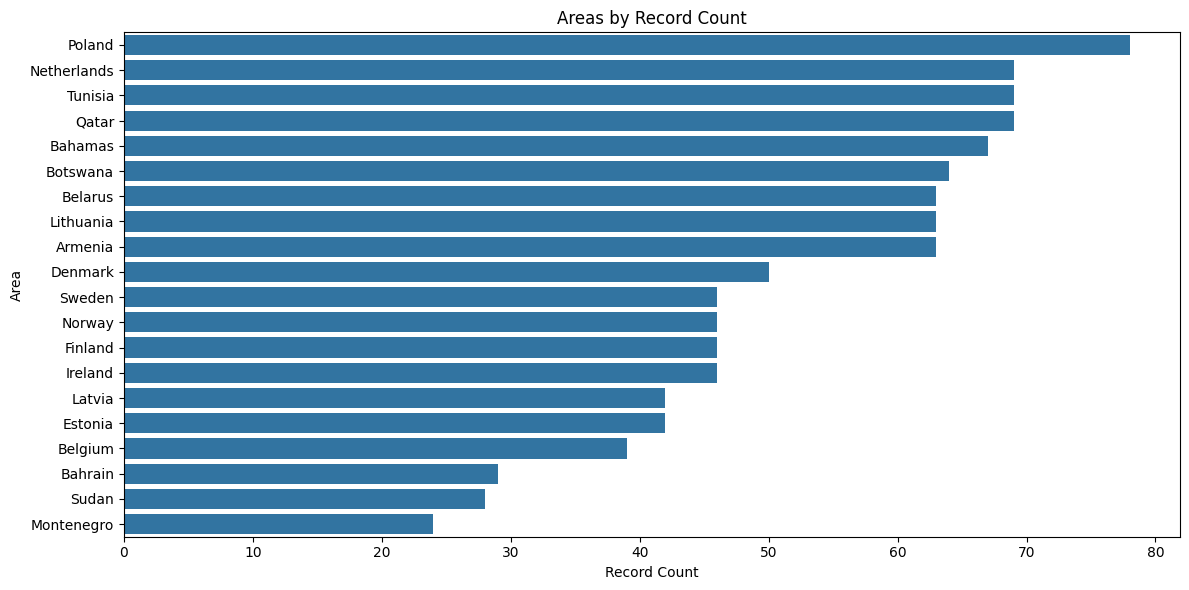

In [ ]:
# Count occurrences of each Country Bottom 20
Area_counts = yield_df['Area'].value_counts().tail(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=Area_counts.values, y=Area_counts.index)

plt.title('Bottom 20 Areas by Record Count')
plt.xlabel('Record Count')
plt.ylabel('Area')
plt.tight_layout()
plt.show()

This bar chart highlights the 20 countries with the fewest entries in the dataset.
Countries like Montenegro, Sudan, and Bahrain have the lowest number of records, which may affect the reliability of any analysis involving these regions.

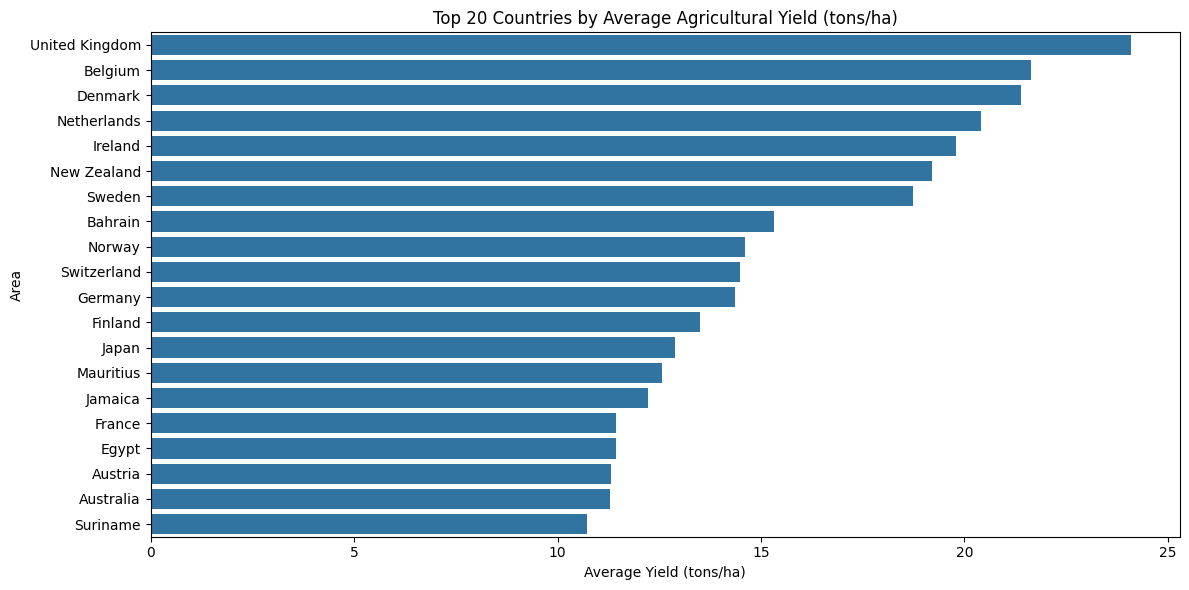

In [123]:
# Average yield by Area
avg_yields = yield_df.groupby('Area')['tons_per_ha'].mean().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_yields.values, y=avg_yields.index)

plt.title('Top 20 Countries by Average Agricultural Yield (tons/ha)')
plt.xlabel('Average Yield (tons/ha)')
plt.ylabel('Area')
plt.tight_layout()
plt.show()

The chart above highlights the top 20 countries with the highest average crop yields. These values reflect the efficiency of agricultural production per hectare and may indicate the influence of climate, technology, or farming practices.


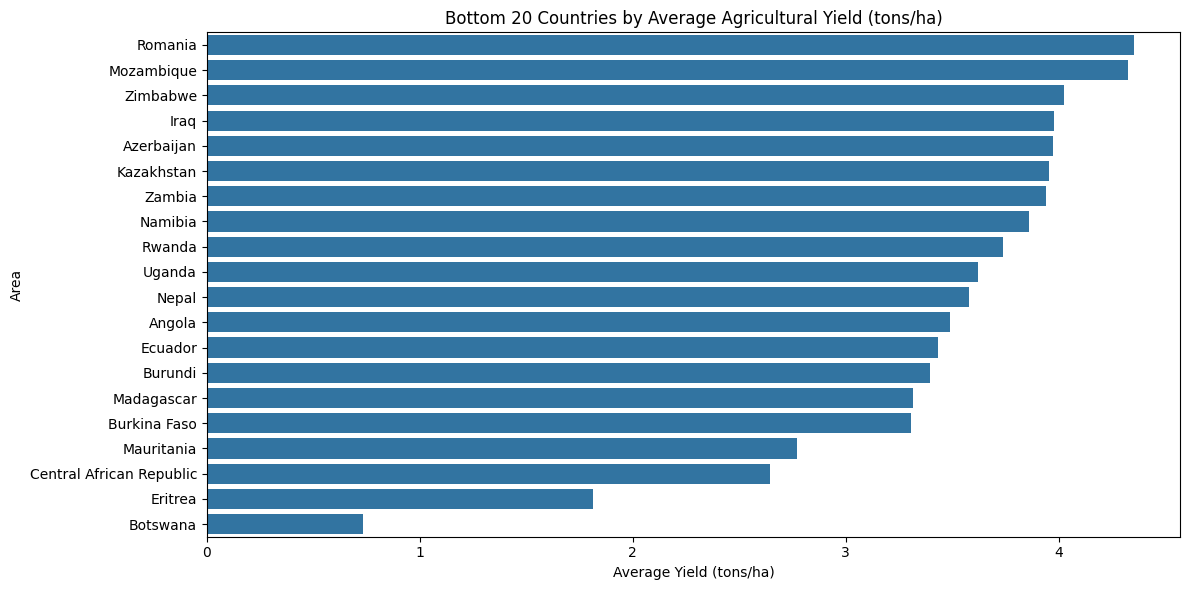

In [258]:
# Average yield by Area
avg_yields = yield_df.groupby('Area')['tons_per_ha'].mean().sort_values(ascending=False).tail(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_yields.values, y=avg_yields.index)

plt.title('Bottom 20 Countries by Average Agricultural Yield (tons/ha)')
plt.xlabel('Average Yield (tons/ha)')
plt.ylabel('Area')
plt.tight_layout()
plt.show()


This bar chart shows the countries with the lowest average agricultural yield across the dataset. These regions may face challenges such as climate limitations, lower input use, or infrastructure gaps. The comparison highlights global disparities in productivity and can help identify areas where targeted agricultural investments or policy support might be most impactful.


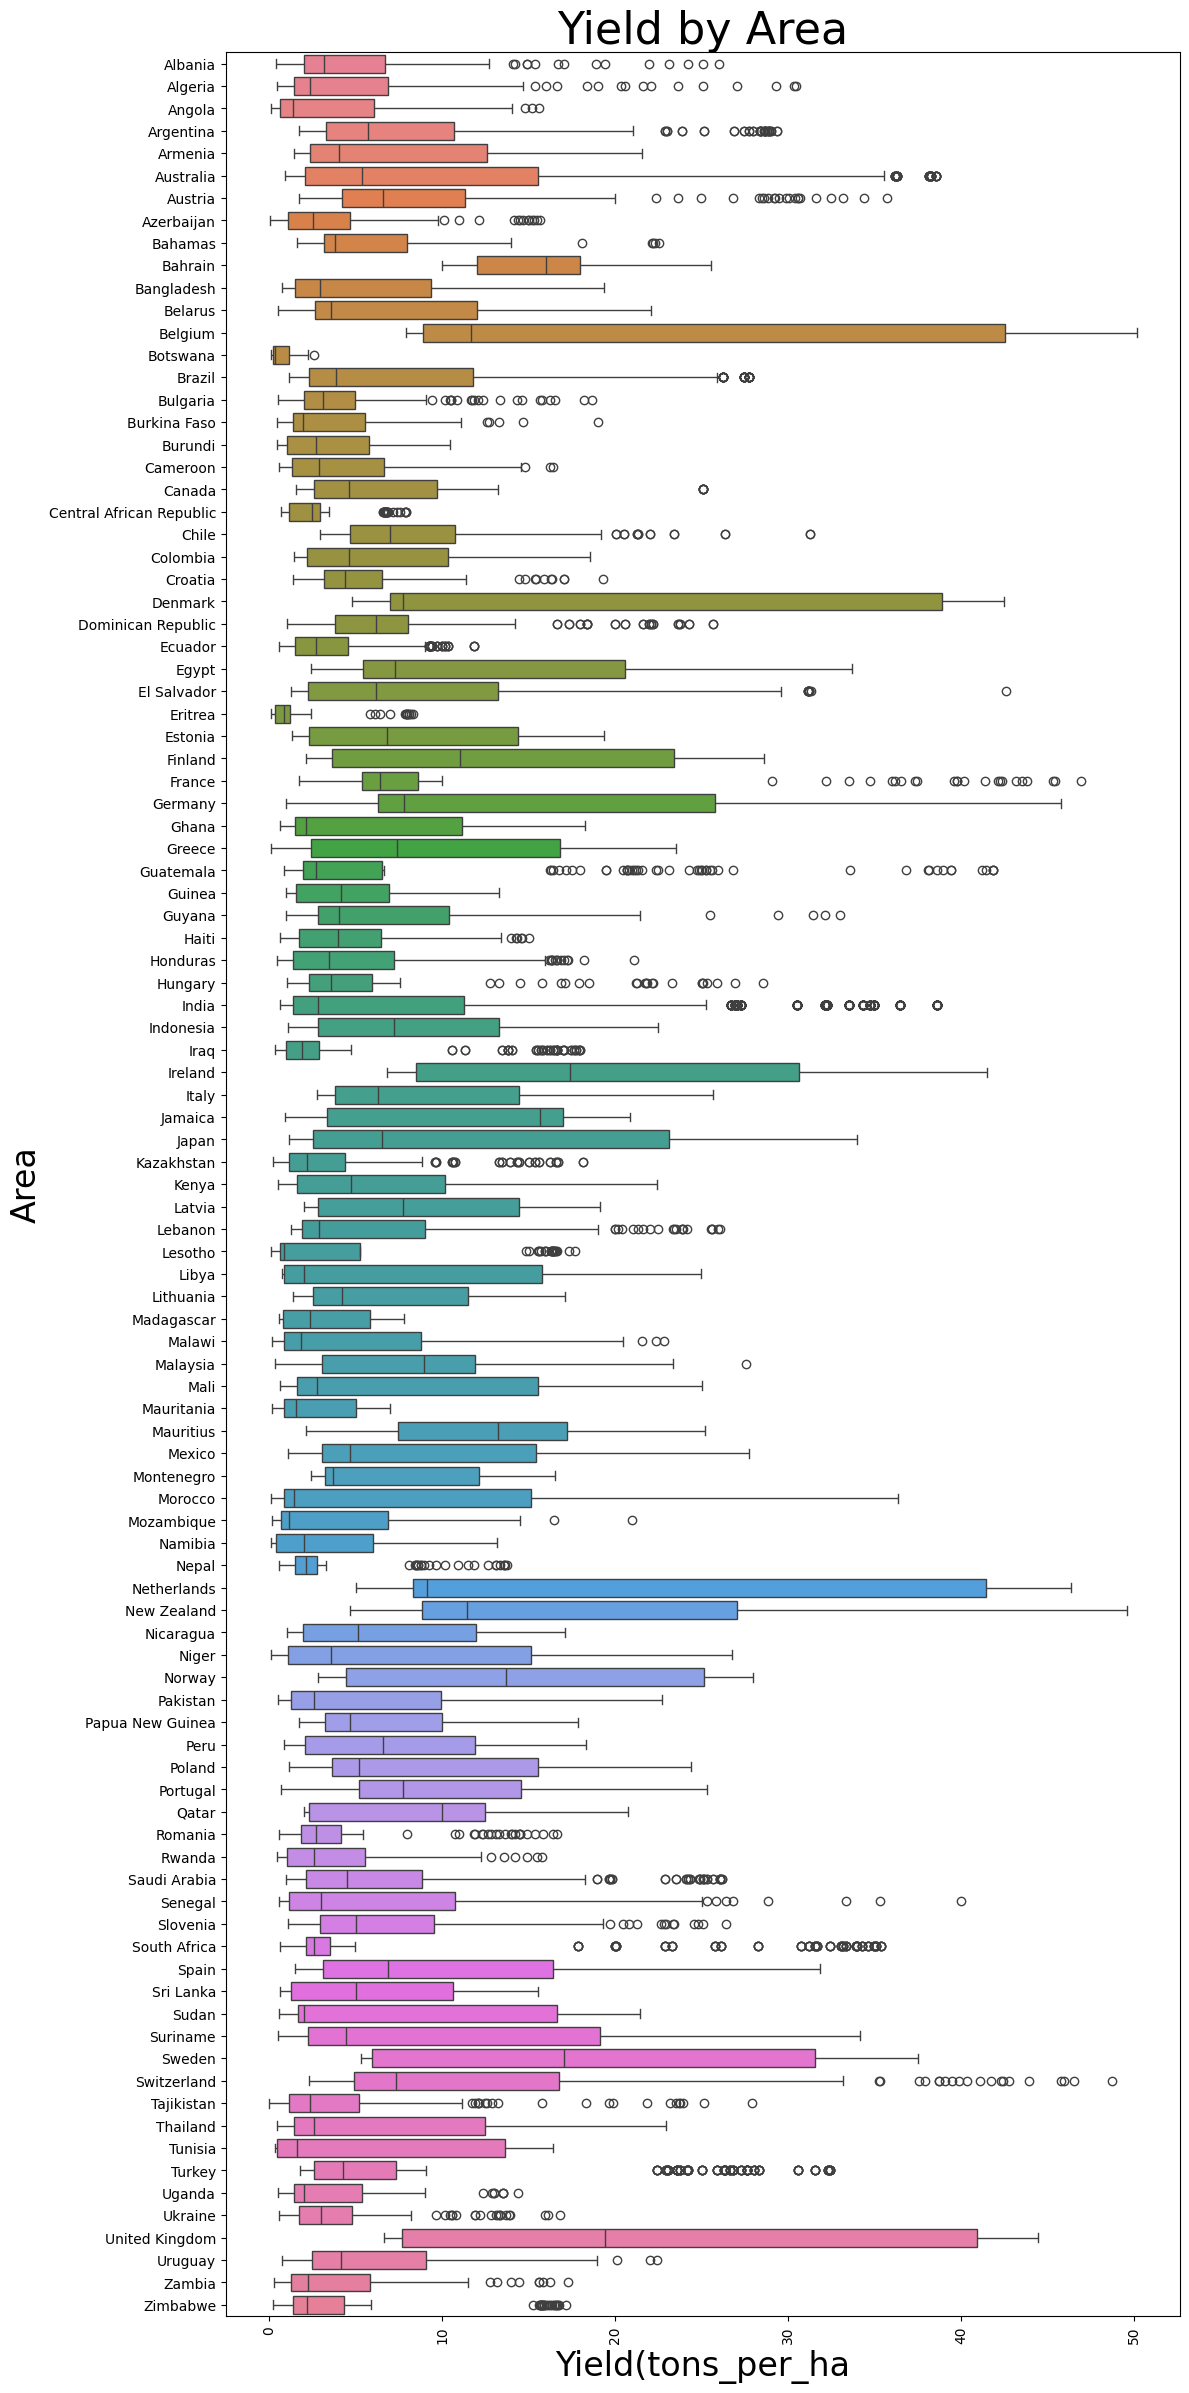

In [257]:
#Boxplot of yield by Area
plt.figure(figsize=(12,24))
sns.boxplot(data=yield_df, x='tons_per_ha', y='Area', hue='Area', legend=False)
plt.title('Yield by Area', fontsize=32)
plt.ylabel('Area',fontsize=24)
plt.xlabel(('Yield(tons_per_ha'), fontsize=24)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

This boxplot shows the distribution of crop yields across different countries.
- Some countries, like Netherlands, New Zealand, and Belgium, show higher range in yields.
- Others, such as Botswana or Eritrea, tend to have lower and more concentrated yields.

The wide spread and frequent outliers indicate large variations in agricultural productivity, possibly due to crop type, climate, or farming practices.

This plot helps highlight which areas consistently produce higher yields and where variability is more pronounced.

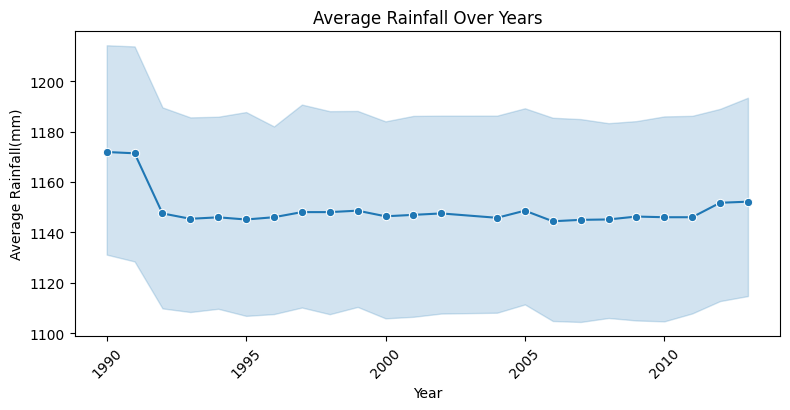

In [172]:
#Lineplot of average rainfall over time
plt.figure(figsize=(8,4))
sns.lineplot(data=yield_df, y='average_rain_fall_mm_per_year', x='Year', marker='o', linestyle='-')
plt.title('Average Rainfall Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rainfall(mm)')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

This line plot shows the average annual rainfall(mm) (in mm) across all countries.
Rainfall levels appear relatively stable over time, with a slight decline in the early 1990s followed by consistent averages in later years.
The shaded area represents the 95% confidence interval, highlighting yearly variation in rainfall across regions.

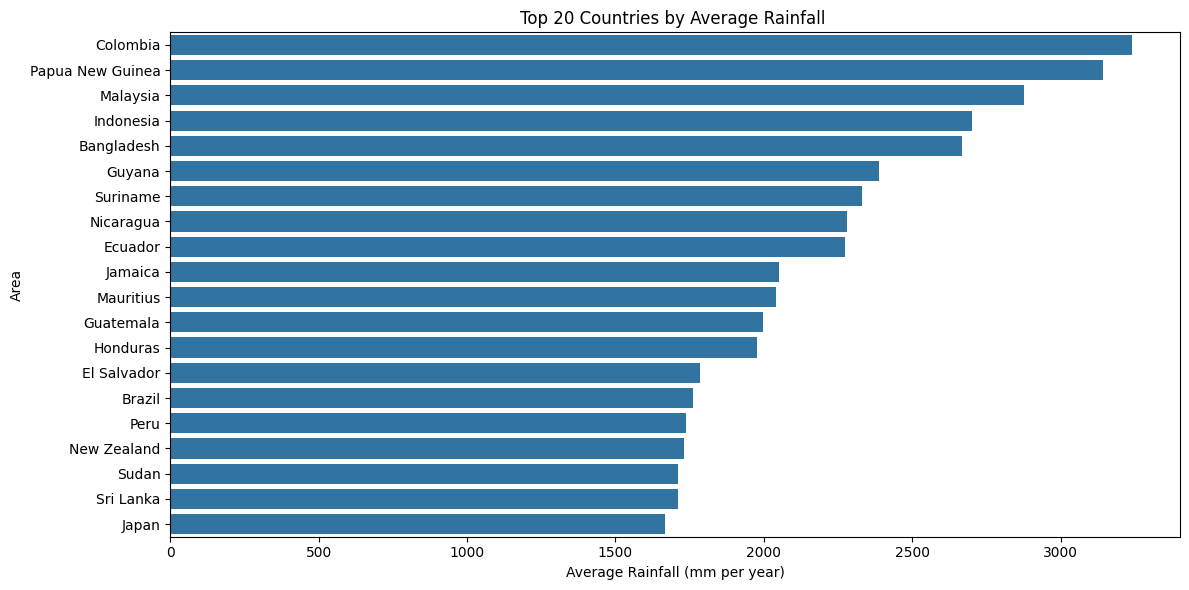

In [ ]:
# Average Rainfall by Area Top 20
avg_rain = yield_df.groupby('Area')['average_rain_fall_mm_per_year'].mean().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rain.values, y=avg_rain.index)

plt.title('Top 20 Countries by Average Rainfall ')
plt.xlabel('Average Rainfall (mm per year)')
plt.ylabel('Area')
plt.tight_layout()
plt.show()

The chart above shows the top 20 countries in our dataset with the highest average annual rainfall. These regions typically receive over 2,000 mm of rain per year, which can have significant effects on crop selection, growth cycles, and potential yield outcomes.


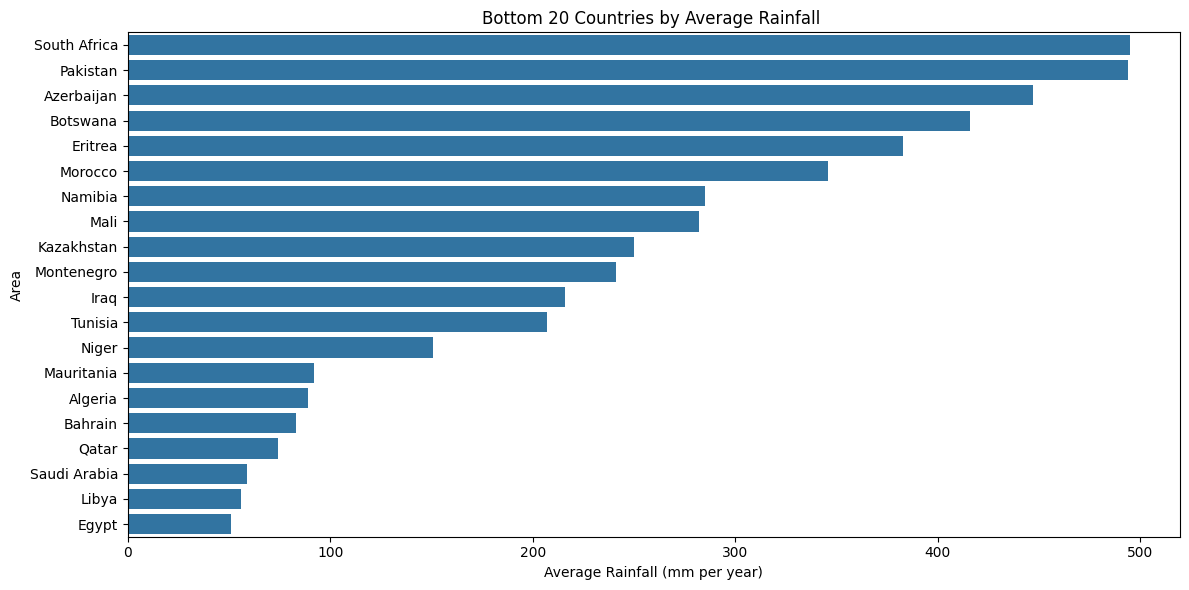

In [ ]:
# Average Rainfall by Area Bottom 20
avg_rain = yield_df.groupby('Area')['average_rain_fall_mm_per_year'].mean().sort_values(ascending=False).tail(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rain.values, y=avg_rain.index)

plt.title('Bottom 20 Countries by Average Rainfall ')
plt.xlabel('Average Rainfall (mm per year)')
plt.ylabel('Area')
plt.tight_layout()
plt.show()

The chart above displays the 20 countries in our dataset with the lowest average annual rainfall. These dry regions—such as Egypt, Libya, and Saudi Arabia, receive less than 100 mm of rainfall per year. This climate constraint likely impacts agricultural productivity and may require more intensive irrigation or drought-resistant crops.


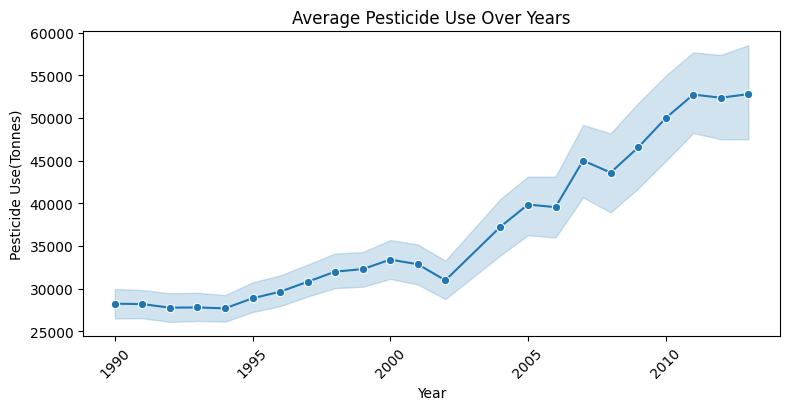

In [168]:
#Lineplot of pesticide use  over years
plt.figure(figsize=(8,4))
sns.lineplot(data=yield_df, y='pesticides_tonnes', x='Year', marker='o', linestyle='-')
plt.title('Average Pesticide Use Over Years')
plt.xlabel('Year')
plt.ylabel('Pesticide Use(Tonnes)')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

This line plot shows the average pesticide use over time.
We can see a gradual increase in pesticide usage over the years, with more rapid growth starting around the early 2000s. The shaded area represents a 95% confidence interval around the mean.
This trend may reflect increased agricultural intensity, pest pressure, or changes in farming practices.

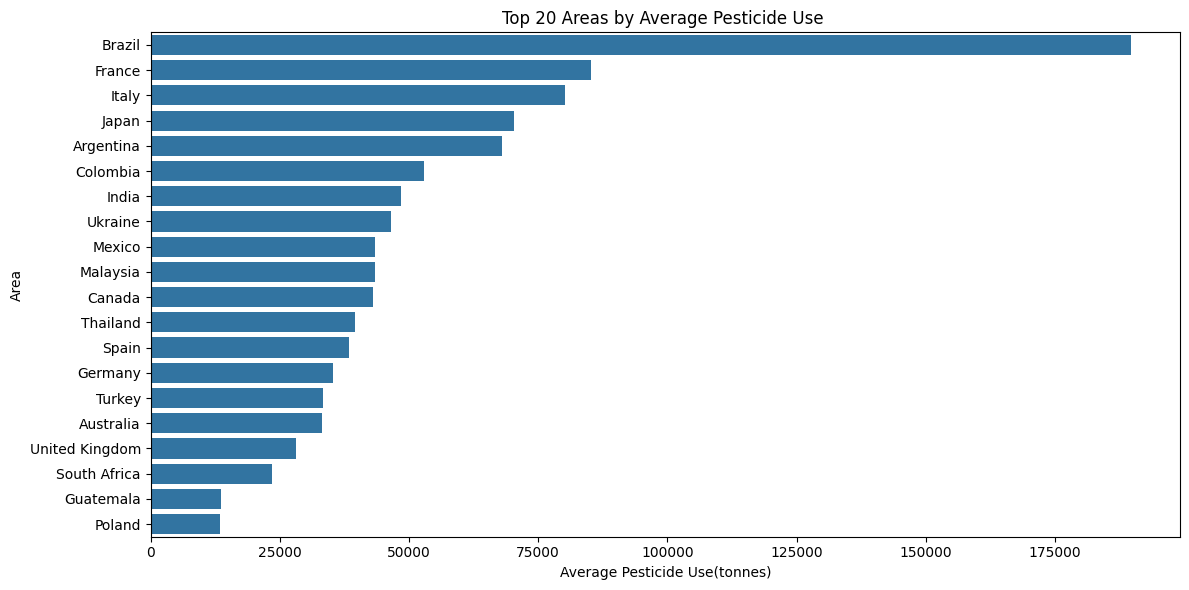

In [135]:
# Average Pesticide Use by Area
avg_pesticide = yield_df.groupby('Area')['pesticides_tonnes'].mean().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_pesticide.values, y=avg_pesticide.index)

plt.title('Top 20 Areas by Average Pesticide Use ')
plt.xlabel('Average Pesticide Use(tonnes)')
plt.ylabel('Area')
plt.tight_layout()
plt.show()

This bar chart shows the top 20 countries by **average pesticide use** (in tonnes). Brazil stands out with significantly higher usage, followed by France, Italy, and Japan. These countries may have large-scale agricultural operations or more intensive farming practices. Monitoring pesticide use is important for understanding environmental impact and food safety concerns.


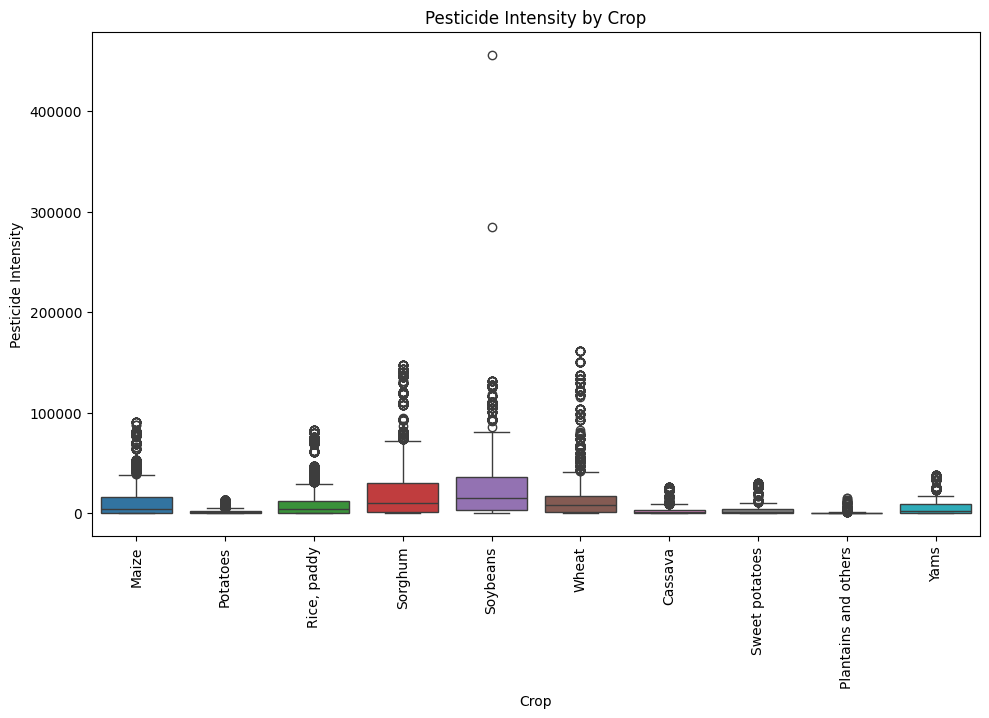

In [ ]:
#Boxplot of pesticide intensity by crop
plt.figure(figsize=(10,6))
sns.boxplot(data=yield_df, y='pesticide_intensity', x='Item', hue='Item',legend=False)
plt.title('Pesticide Intensity by Crop')
plt.xlabel('Crop')
plt.ylabel('Pesticide Intensity')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


This boxplot compares pesticide intensity across different crop types. While most crops cluster around lower pesticide usage, a few, particularly **Wheat**, **Soybeans**, and **Sorghum** show wide variation and extreme outliers, indicating potentially heavy or inconsistent pesticide application in some regions or years.

This insight can help target crops that may benefit most from pesticide optimization or regulation.


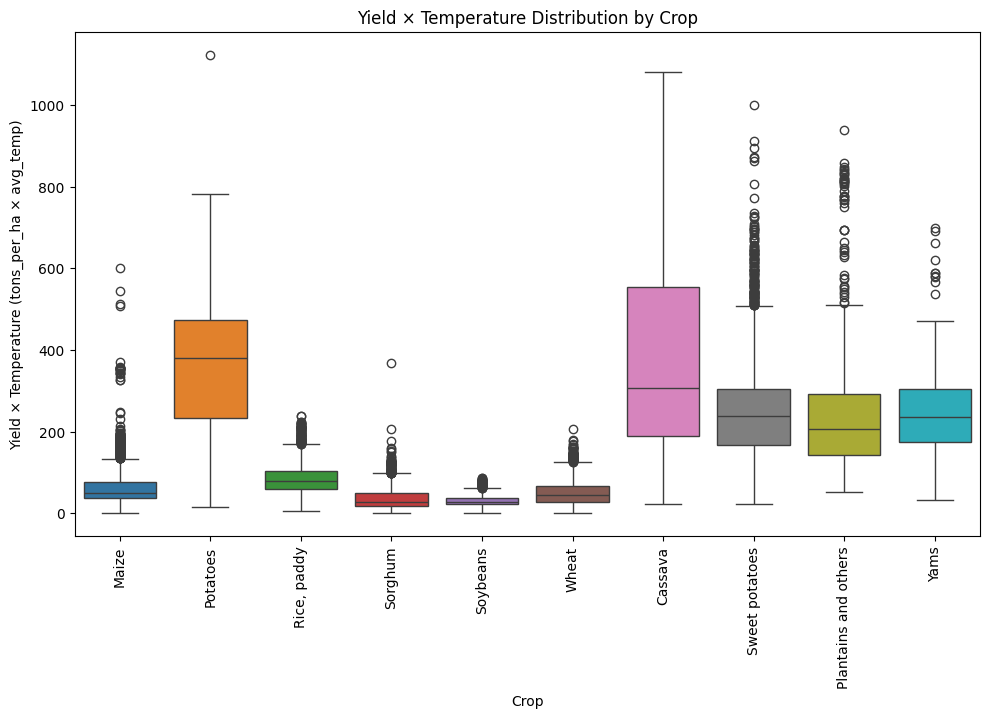

In [236]:
#Boxplot of Yield × Temperature Distribution by Crop
plt.figure(figsize=(10,6))
sns.boxplot(data=yield_df, y='yield_vs_avg_temp', x='Item', hue='Item',legend=False)
plt.title('Yield × Temperature Distribution by Crop')
plt.xlabel('Crop')
plt.ylabel('Yield × Temperature (tons_per_ha × avg_temp)')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

This boxplot explores how the interaction between yield and average temperature varies across crop types. It helps surface which crops tend to thrive in warmer regions with high productivity, and where outliers suggest exceptional performance or variability.

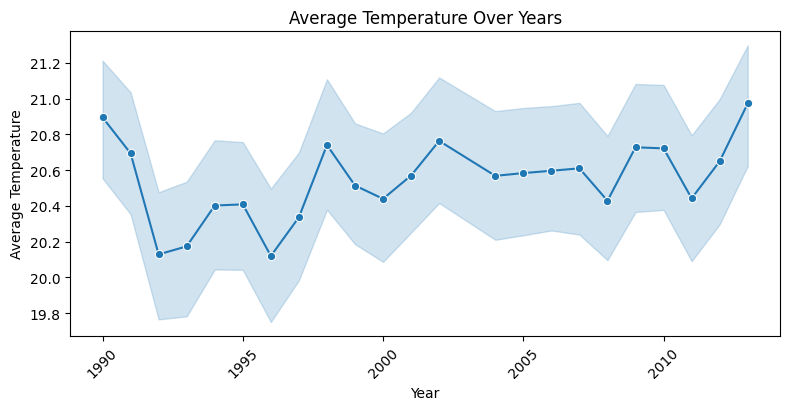

In [171]:
#Lineplot of average temperature over years
plt.figure(figsize=(8,4))
sns.lineplot(data=yield_df, y='avg_temp', x='Year', marker='o', linestyle='-')
plt.title('Average Temperature Over Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

This line plot shows the average annual temperature across all countries in the dataset.
While there are fluctuations from year to year, the overall average remains relatively stable, with a slight upward trend in recent years.
The shaded region shows the 95% confidence interval, helping visualize the variability in temperature data each year

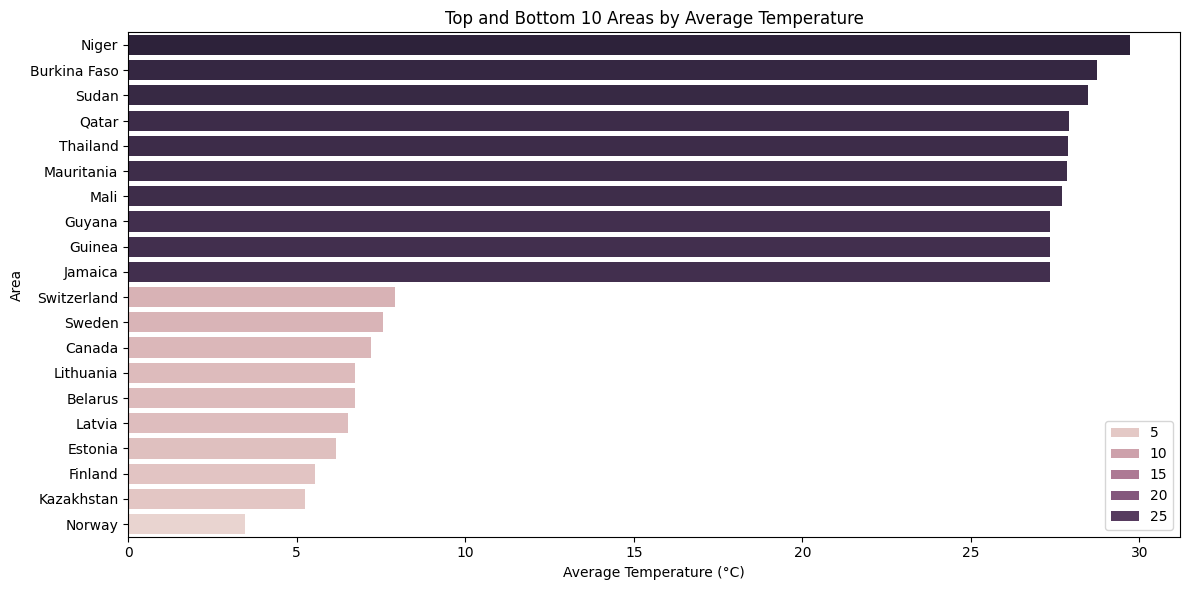

In [229]:
# Average temperature by Area
avg_temp = yield_df.groupby('Area')['avg_temp'].mean().sort_values(ascending=False)

# Combine bottom 10 and top 10
combined_temp = pd.concat([avg_temp.head(10), avg_temp.tail(10)])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=combined_temp.values, y=combined_temp.index, hue=combined_temp.values)

plt.title('Top and Bottom 10 Areas by Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Area')
plt.tight_layout()
plt.show()



This bar chart shows the **10 hottest** and **10 coldest** countries based on average yearly temperature.

- The hottest countries include **Niger,Burkina Faso and Sudan**, all averaging above 27°C.
- The coldest countries include **Norway, Finland, and Kazakhstan**, with averages below 7°C.

These insights help us understand how temperature differences may impact agricultural productivity and crop selection across regions.


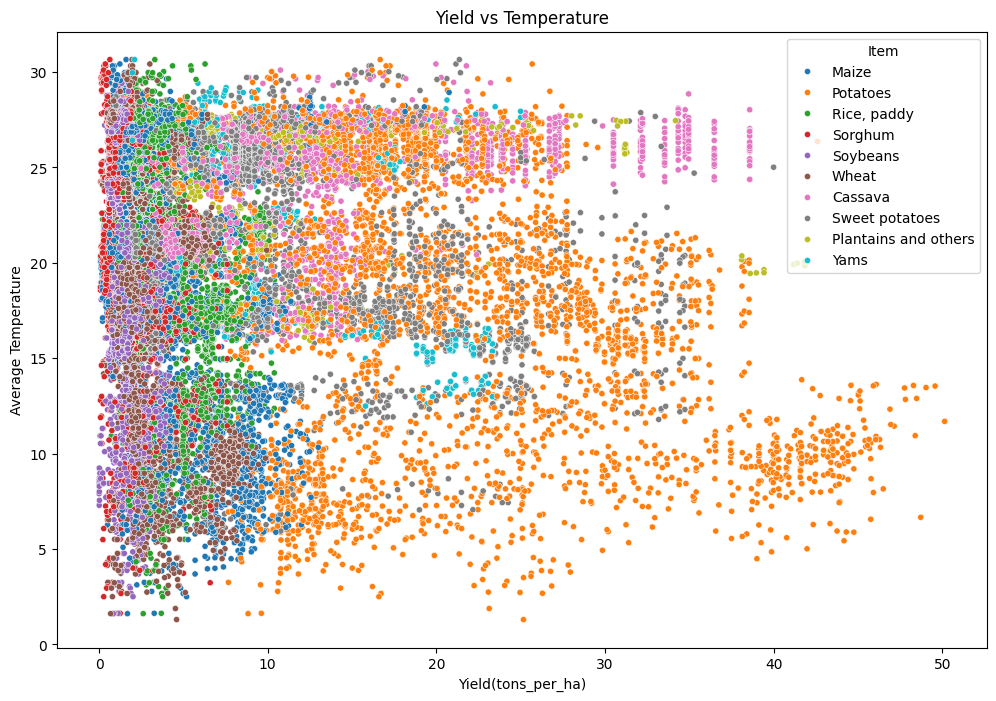

In [100]:
#Scatter plot to show relation between yield and temperature 
plt.figure(figsize=(12,8))
sns.scatterplot(data=yield_df, x='tons_per_ha', y='avg_temp', s=20, hue='Item')
plt.title("Yield vs Temperature")
plt.xlabel("Yield(tons_per_ha)")
plt.ylabel("Average Temperature")
plt.show()


This scatter plot explores the relationship between yield and average temperature across different crop types. While there’s no strong linear trend, certain crops like potatoes appear in a wide range of temperatures and yields, indicating adaptability. And most of the high yield comes from potatoes,sweet potatoes and cassava. 


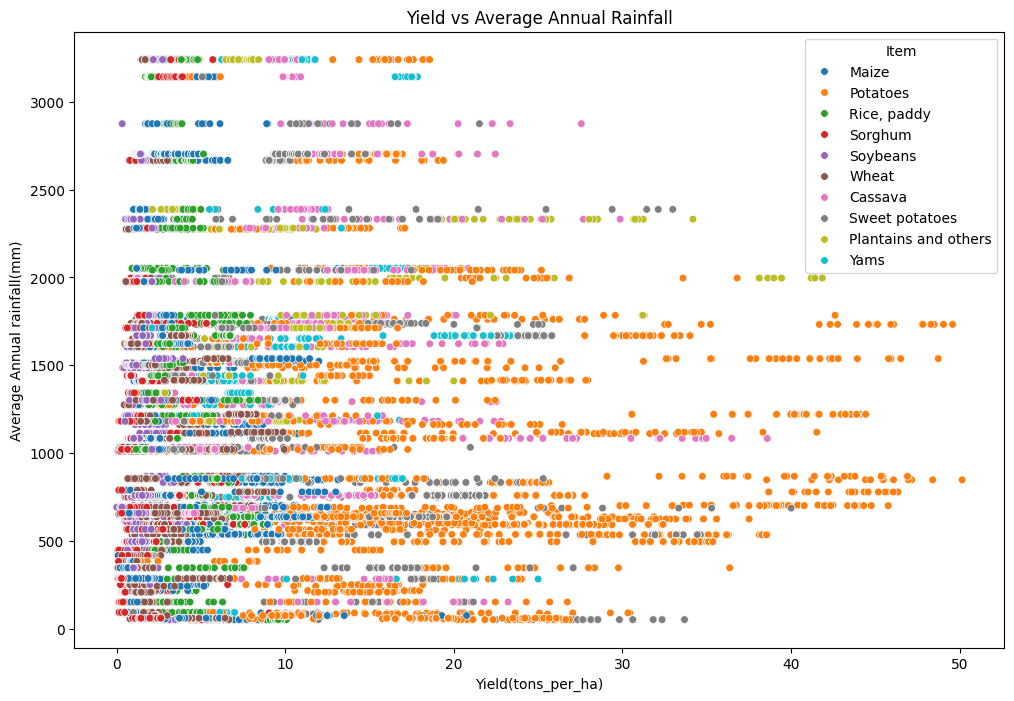

In [150]:
#Scatter plot to show relation between yield and Rainfall
plt.figure(figsize=(12,8))
sns.scatterplot(data=yield_df, x='tons_per_ha', y='average_rain_fall_mm_per_year', s=30, hue='Item')
plt.title("Yield vs Average Annual Rainfall")
plt.xlabel("Yield(tons_per_ha)")
plt.ylabel("Average Annual rainfall(mm)")
plt.show()



This scatter plot explores the relationship between **crop yield** and **average annual rainfall** across different crop types. Each point represents a record that is country-year-crop combination, color-coded by crop type. While there is no strong linear trend visible, certain crops (e.g., Potatoes and Cassava) tend to achieve higher yields under moderate rainfall conditions. This view helps us understand how water availability may influence productivity across crops.


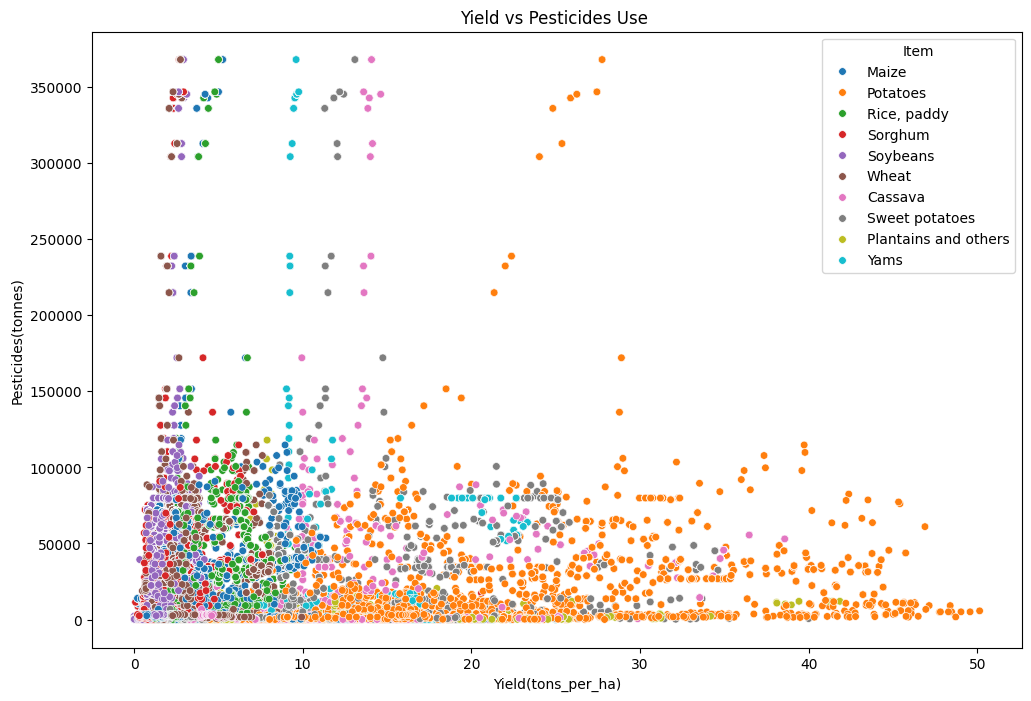

In [151]:
#Scatter plot to show relation between yield and Pesticide Use
plt.figure(figsize=(12,8))
sns.scatterplot(data=yield_df, x='tons_per_ha', y='pesticides_tonnes', s=30, hue='Item')
plt.title("Yield vs Pesticides Use ")
plt.xlabel("Yield(tons_per_ha)")
plt.ylabel("Pesticides(tonnes)")
plt.show()

This scatter plot visualizes the relationship between crop yield and pesticide use, colored by crop type.
While some crops like potatoes appear at high yield levels with moderate pesticide use, others cluster at lower yield ranges.
There are also extreme pesticide usage outliers that are very likely due to specific crops being cultivated in certain countries that use unusually high levels of pesticides.

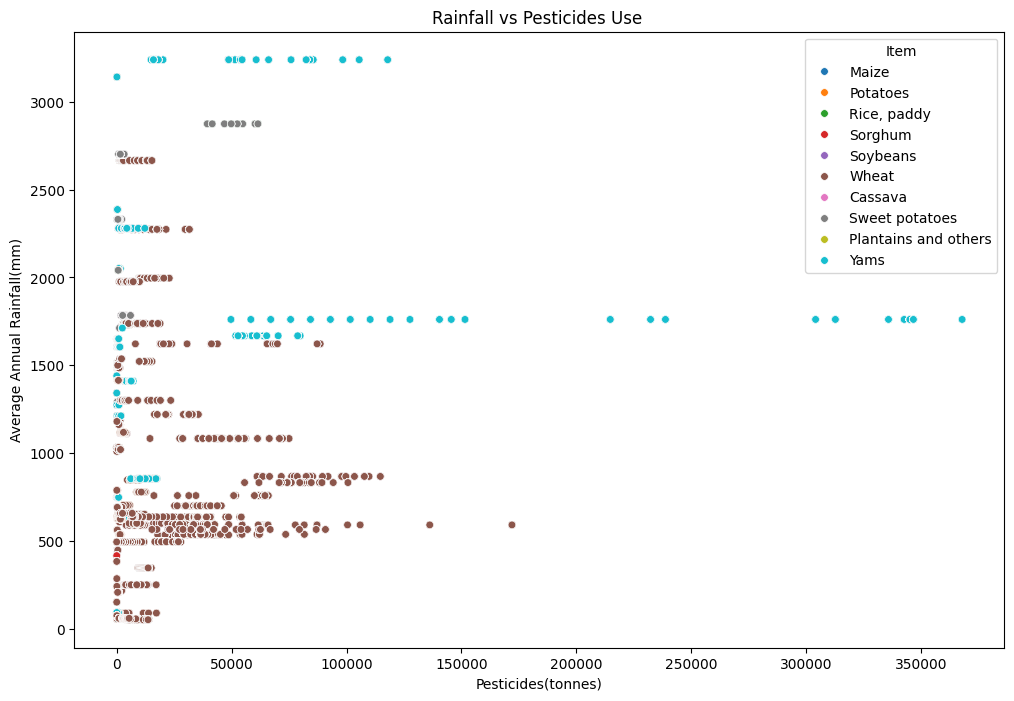

In [177]:
#Scatter plot for rainfall vs pesticide use 
plt.figure(figsize=(12,8))
sns.scatterplot(data=yield_df, y='average_rain_fall_mm_per_year', x='pesticides_tonnes', s=30, hue='Item')
plt.title("Rainfall vs Pesticides Use ")
plt.ylabel("Average Annual Rainfall(mm)")
plt.xlabel("Pesticides(tonnes)")
plt.show()

This scatter plot explores the relationship between pesticide usage and average annual rainfall, colored by crop type.Each point represents a country–crop–year combination.

There appears to be no strong linear relationship between rainfall and pesticide use.
However, some crops like Yams and Wheat show clusters at higher pesticide usage, regardless of rainfall, while others like Sorghum tend to stay on the lower end for both.

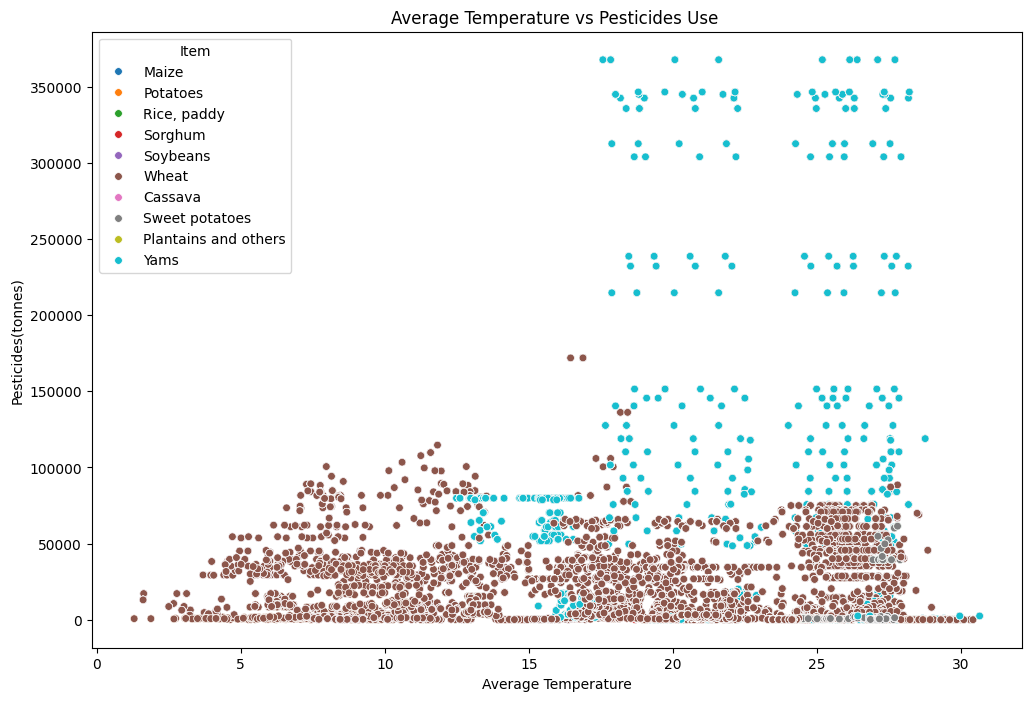

In [179]:
#Scatter plot for average temperature vs pesticide use 
plt.figure(figsize=(12,8))
sns.scatterplot(data=yield_df, x='avg_temp', y='pesticides_tonnes', s=30, hue='Item')
plt.title("Average Temperature vs Pesticides Use ")
plt.xlabel("Average Temperature")
plt.ylabel("Pesticides(tonnes)")
plt.show()

This scatter plot shows how pesticide usage relates to average temperature, with points colored by crop type.
- Yams and Wheat are heavily associated with high pesticide use, across a wide range of temperatures.
- Other crops tend to cluster at lower pesticide levels, even in warmer climates.
- There is no clear correlation between temperature and pesticide usage overall, but crop type plays a major role in pesticide intensity.

This view helps identify crops that may require more intensive pesticide management regardless of climate conditions.

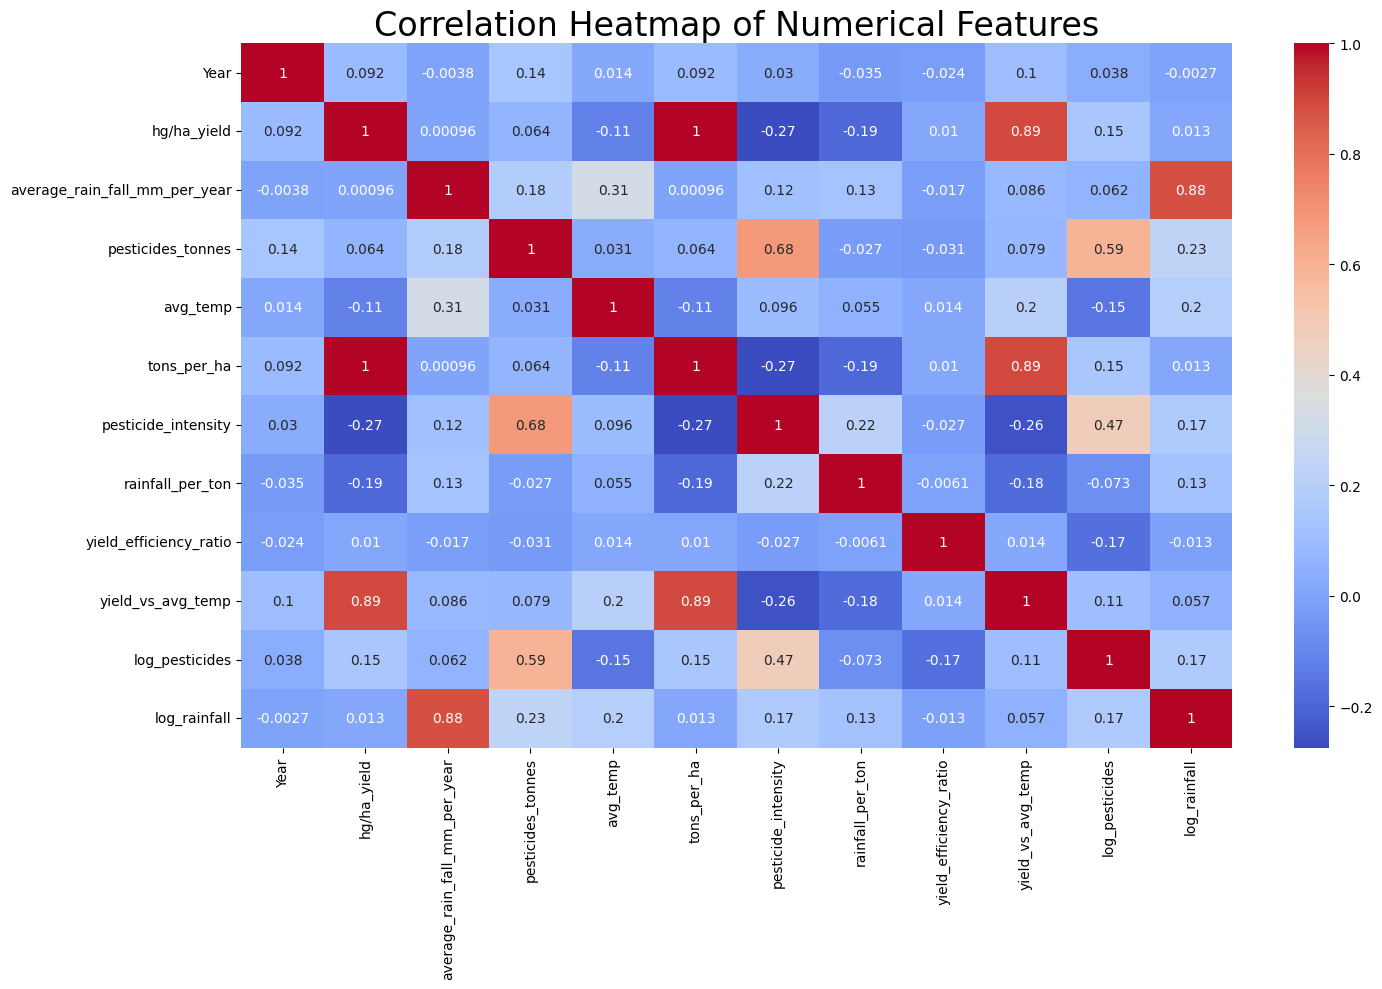

In [ ]:
# Correlation heatmap based on numeric features
plt.figure(figsize=(15, 10))
#Show the heatmap
sns.heatmap(yield_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features", fontsize=24)
plt.tight_layout()
plt.show()

**Correlation Between Numeric Features**

This heatmap shows the correlation between all numerical features in the dataset, including raw and engineered variables.
- Most environmental factors (rainfall, temperature) show **weak or no correlation** with raw yield values, suggesting other factors may play a bigger role in productivity.

This visualization helps identify which variables may be useful in modeling or require further exploration.I will drop redundant features before modeling.


### Exploratory Data Analysis(EDA) Summary

In the EDA step, I explored the relationships between yield and various environmental and input features using visual analysis. This helped me build a high-level understanding of the dataset and surface meaningful patterns. A few key insights from this step include:
- Numeric features are not normally distributed and often right-skewed
- Crop yield varies significantly by crop type and country
- Some features (like pesticide use) show wide variability and outliers
- Visuals revealed weak linear relationships between yield and climate variables, but highlighted differences across crop groups
- Potatoes dominate the average yield among all crops
- The UK, Belgium, and Denmark have the highest average yield (20–30 tons/ha), while Eritrea and Botswana have the lowest (under 2 tons/ha)  
- Yield and pesticide use have both increased over time
- Pesticide use is especially common in wheat and yams, particularly in higher temperature and rainfall conditions   
- Brazil leads in overall pesticide use compared to all other countries
- The USA is not included in the dataset
- Countries like India and Brazil have over 6,000 records, while countries like Montenegro and Sudan have fewer than 60   
- Some regions, like Colombia and Papua New Guinea, receive over 3,000 mm of rainfall annually, while others like Egypt and Libya receive less than 100 mm  
- Average temperatures are highest (25–30°C) in tropical and African countries like Niger, Sudan, and Thailand; lowest (5–10°C) in northern countries like Norway, Finland, and Kazakhstan  
- Some crops, like potatoes, grow across a wide temperature range, while others like cassava tend to grow in hotter climates 



These findings will guide feature selection and modeling decisions in the next steps.

In [ ]:
#Backup dataset just in case 
df1=yield_df.copy()

### Preprocessing Pipeline Preparation

Before building machine learning models, I need to prepare the dataset by selecting relevant features, handling categorical variables, and scaling numeric inputs. In this step, I’ll create a preprocessing pipeline that ensures all transformations are applied consistently and reproducibly during training and prediction.

The pipeline will:
- Drop unnecessary or redundant columns
- Separate features into numeric and categorical groups
- Apply appropriate transformations (scaling, encoding)
- Combine everything into a single pipeline using ColumnTransformer

This structured approach ensures clean input for modeling and makes it easier to integrate the final model into a production-ready workflow.

In [246]:
#Create a Preprocessing Pipeline

#Target Feature
target =yield_df['tons_per_ha']

#Drop redundant features 
yield_df=yield_df.drop(columns=['hg/ha_yield', 'pesticides_tonnes', 
                                'average_rain_fall_mm_per_year','yield_vs_avg_temp'], errors='ignore')

#Numeric features
numeric_features=['Year', 'avg_temp', 'pesticide_intensity','rainfall_per_ton',
                'yield_efficiency_ratio','log_pesticides', 'log_rainfall']

#Categorical features
categorical_features = ['Area', 'Item']

# Create transformer for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing with median
    ('scaler', StandardScaler())  # Scale features to have mean=0, variance=1
])

# Create transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill with most common value
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore')) # Drop first to avoid multicollinearity
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

##### Preprocessing Pipeline Summary

To prepare the dataset for modeling, I built a structured preprocessing pipeline:

- Feature Separation:
    - Numeric features (e.g., temperature, rainfall, efficiency metrics)
    - Categorical features (Area, Item)
- Missing Values:
    - Imputed numeric columns with median
    - Imputed categorical columns with the most frequent value
    - (None were missing, but included for robustness)
- Scaling:
    - Standardized numeric features using StandardScaler for consistent model input
- Encoding:
    - Applied OneHotEncoder to categorical variables, using drop='first' to reduce multicollinearity
- Pipeline Structure:
    - Combined transformations using ColumnTransformer for a clean, modular workflow

This design ensures all preprocessing steps are applied consistently during training and testing, and sets the foundation for a reproducible modeling pipeline.

## Modeling and Evaluation

In this section, I will apply the preprocessing pipeline and split the data into training and testing sets. Then, I will build and evaluate three different models to predict crop yield. Each model will be wrapped in a full pipeline to ensure consistent preprocessing.

After comparing their performance using key metrics (R², MAE, RMSE), I will tune hyperparameters using GridSearchCV for the best-performing model. Finally, I will finalize the model and evaluate its performance on the test set.

In [259]:
#Creating base models for the prepared data 
#Split data into features and target
X =yield_df.drop(columns=['tons_per_ha'])
y = target

# Split into training and test sets (80% train, 20% test) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Check shapes as quick sanity check
print(f"Training set shape: {X_train.shape, y_train.shape}")
print(f"Test set shape: {X_test.shape, y_test.shape}")



Training set shape: ((22593, 9), (22593,))
Test set shape: ((5649, 9), (5649,))


In [262]:
# Create Linear Regression pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Create Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Create XGBoost pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

In [263]:
# Fit models on training data
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"{model_name} Results:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print("-" * 50)

# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Linear Regression Results:
R² Score: 0.7595
MAE: 2.9640
RMSE: 4.1766
--------------------------------------------------
Random Forest Results:
R² Score: 0.9990
MAE: 0.0541
RMSE: 0.2663
--------------------------------------------------
XGBoost Results:
R² Score: 0.9987
MAE: 0.1344
RMSE: 0.3072
--------------------------------------------------


The results show a clear progression in model performance. Linear Regression provides a solid baseline with an R² of 0.76, but both tree-based models significantly outperform it. Random Forest achieved the highest accuracy with an R² of 0.999, followed closely by XGBoost at 0.9987. Both models also reported very low error values (MAE and RMSE), indicating strong predictive capability. These results suggest that non-linear models are better suited for capturing the complex patterns in crop yield prediction. The next step is to fine-tune these models using GridSearchCV to confirm and optimize their performance.

In [266]:
#Define scoring metrics
scoring = {
    'r2': 'r2',
    'neg_mae': 'neg_mean_absolute_error',
    'neg_rmse': 'neg_root_mean_squared_error'
}

# Random Forest Regressor parameter grid
rf_param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 'log2']
}

# XGBoost Regressor parameter grid
xgb_param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

In [267]:
# Random Forest Grid Search
rf_grid_search = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=5,
    scoring=scoring,
    refit='r2',
    return_train_score=True,
    n_jobs=-1
)
rf_grid_search.fit(X_train, y_train)

# XGBoost Grid Search
xgb_grid_search = GridSearchCV(
    xgb_pipeline,
    xgb_param_grid,
    cv=5,
    scoring=scoring,
    refit='r2',
    return_train_score=True,
    n_jobs=-1
)
xgb_grid_search.fit(X_train, y_train)


/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'model__learning_rate': [0.01, 0.1, ...], 'model__max_depth': [3, 5, ...], 'model__n_estimators': [100, 200], 'preprocessor__num__imputer__strategy': ['mean', 'median']}"
,scoring,"{'neg_mae': 'neg_mean_absolute_error', 'neg_rmse': 'neg_root_mean_squared_error', 'r2': 'r2'}"
,n_jobs,-1
,refit,'r2'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,transformers,"[('num', ...), ('cat', ...)]"


In [268]:
# Check best parameters from GridSearchCV
print("Best Parameters for Random Forest:")
print(rf_grid_search.best_params_)

print("\nBest Parameters for XGBoost:")
print(xgb_grid_search.best_params_)

Best Parameters for Random Forest:
{'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 200, 'preprocessor__num__imputer__strategy': 'mean'}

Best Parameters for XGBoost:
{'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 200, 'preprocessor__num__imputer__strategy': 'mean'}


#### Best Hyperparameters from GridSearch

**Random Forest Regressor:**
- model__n_estimators: 200  
- model__max_depth: None  
- model__min_samples_leaf: 1  
- model__max_features: 'sqrt'  
- preprocessor__num__imputer__strategy: 'mean'  

**XGBoost Regressor (Final Model):**
- model__n_estimators: 200  
- model__max_depth: 7  
- model__learning_rate: 0.2  
- preprocessor__num__imputer__strategy: 'mean' 

In [269]:
# Retrieve best estimators from grid search
best_rf_model = rf_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_

# Predict on the test set using the tuned models
y_pred_rf_best = best_rf_model.predict(X_test)
y_pred_xgb_best = best_xgb_model.predict(X_test)

In [270]:
# Evaluate the tuned models
evaluate_model(y_test, y_pred_rf_best, "Tuned Random Forest")
evaluate_model(y_test, y_pred_xgb_best, "Tuned XGBoost")

Tuned Random Forest Results:
R² Score: 0.9964
MAE: 0.1834
RMSE: 0.5117
--------------------------------------------------
Tuned XGBoost Results:
R² Score: 0.9990
MAE: 0.0878
RMSE: 0.2638
--------------------------------------------------


### Model Optimization Summary

In this step, I tuned both the Random Forest and XGBoost models using GridSearchCV with 5-fold cross-validation. The goal was to improve performance and reduce the risk of overfitting by finding the best combination of hyperparameters.

While the untuned Random Forest model showed slightly better performance than XGBoost, tuning significantly improved the XGBoost results. After optimization, the **XGBoost model achieved the best overall test performance** and was selected as the final model for deployment and interpretation.


### Final Model Evaluation

In this step, I evaluate the tuned XGBoost model using the test dataset.  
This helps validate the model's performance on unseen data and ensures that it generalizes well beyond the training process.

I’ll use standard regression metrics;  **R²**, **MAE**, and **RMSE**  to assess its accuracy and stability.

In [271]:
# Get best model after tuning
final_model = xgb_grid_search.best_estimator_

# Predict on test set
final_preds = final_model.predict(X_test)

# Evaluate using the existing function
evaluate_model(y_test, final_preds, "Final Tuned XGBoost")

Final Tuned XGBoost Results:
R² Score: 0.9990
MAE: 0.0878
RMSE: 0.2638
--------------------------------------------------


### Final Model Performance

Final tuned XGBoost model performed exceptionally well, achieving an R² score of **0.9990**, with very low MAE and RMSE values. This indicates that the model is able to predict crop yield with high accuracy on the test set.

Next, I'll analyze **feature importance** to understand which factors contribute most to the model's predictions. This will help us draw meaningful insights and provide recommendations for improving agricultural yield.

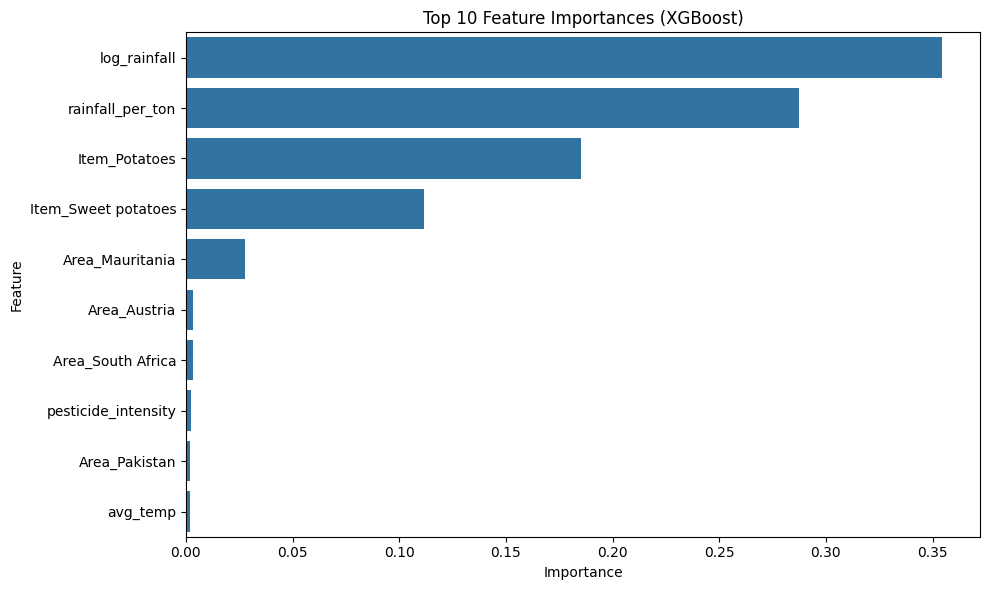


Top 5 most important features:
                 Feature  Importance
6           log_rainfall    0.354538
3       rainfall_per_ton    0.287461
109        Item_Potatoes    0.184999
113  Item_Sweet potatoes    0.111823
66       Area_Mauritania    0.027642


In [274]:
# Get the XGBoost model from the pipeline
xgb_model = final_model.named_steps['model']

# Get the preprocessor from the pipeline
preprocessor = final_model.named_steps['preprocessor']

# Start with numeric feature names
feature_names = list(numeric_features)

# Get encoded categorical feature names
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
encoded_cat_features = cat_encoder.get_feature_names_out(categorical_features)

# Append encoded names
feature_names.extend(encoded_cat_features)

# Get feature importances from XGBoost model
importances = xgb_model.feature_importances_

# Combine into DataFrame
feature_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp.head(10))
plt.title('Top 10 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

# Show top 5 features in text
print("\nTop 5 most important features:")
print(feature_imp.head(5))

### Feature Importance Insights

The most important feature in final XGBoost model was **log_rainfall**, followed by **rainfall_per_ton**. These two rainfall-related features had the strongest influence on yield predictions, which aligns with the idea that water availability plays a critical role in crop productivity.

Crop type also mattered specifically, **Potatoes** and **Sweet Potatoes** had high importance, suggesting their yield patterns were distinctive and well-learned by the model.

Regional effects were less influential overall, though a few locations (e.g., **Mauritania**) showed some signal. Interestingly, **pesticide_intensity** and **avg_temp** had very low importance in this model.

These results highlight the strong role of **rainfall** and **crop type** in determining yield across regions.


In [290]:
# Save the final XGBoost pipeline for future use
import joblib

# Save the model to a file
joblib.dump(final_model, 'xgboost_yield_pipeline.pkl')

print("Final model pipeline saved successfully as 'xgboost_yield_pipeline.pkl'.")

# Example: Load the model back when needed
# loaded_model = joblib.load('xgboost_yield_pipeline.pkl')
# predictions = loaded_model.predict(new_data)

Final model pipeline saved successfully as 'xgboost_yield_pipeline.pkl'.


**Model Serialization**: To ensure reproducibility and future use, I saved the final XGBoost pipeline (including preprocessing and model) as a **.pkl** file.  
This allows the model to be reloaded later without retraining.

#### How to Use This Model for Future Predictions

The final model is a pipeline that includes preprocessing and XGBoost regression. To make a new prediction, simply create a DataFrame with the same structure as the original features (excluding the target **tons_per_ha**).

Example:

In [288]:
# Example: Predicting yield for Potatoes in Turkey (2022)
new_data = pd.DataFrame([{
    'Area': 'Turkey',
    'Item': 'Potatoes',
    'Year': 2022,
    'avg_temp': 14.5,
    'pesticide_intensity': 0.25,
    'rainfall_per_ton': 1.5,
    'yield_efficiency_ratio': 0.7,
    'log_pesticides': np.log1p(40),
    'log_rainfall': np.log1p(300)
}])

predicted_yield = final_model.predict(new_data)
print(f"Predicted yield: {predicted_yield[0]:.2f} tons per hectare")

Predicted yield: 31.30 tons per hectare


This example shows a realistic prediction for Potatoes in Turkey. The predicted yield of 31.3 tons/ha aligns well with modern yield expectations for this crop under good conditions.


## Evaluation and Recommendations

Based on the full analysis, including feature engineering, model training, and feature importance , our results show key patterns in what drives crop yield across countries and crops.

These findings can inform agricultural decision-making at scale, supporting smarter crop selection, better resource use, and more targeted interventions.

Below are three key takeaways from the model, each followed by clear recommendations.

#### 1. Rainfall is the Most Critical Yield Driver

- Features like **log_rainfall and rainfall_per_ton** were the top predictors in our XGBoost model.accounting for over 64% of total feature importance
- This shows that **water availability and efficiency** are central to high yield outcomes.
- Excess rainfall doesn't always help,  the model captured diminishing returns depending on how efficiently rainfall translates into output.

**Recommendation:**
- Invest in **precision irrigation** and **rainfall monitoring** tools to optimize water use per crop.
- Develop region-specific strategies to manage both water stress and high moisture.

**Potential Impact:**
- Improved water efficiency leads to better yield under both drought and flood risk.

**How to Measure:**
- Compare yield gains from farms using rainfall sensors or drip systems vs. traditional irrigation.
- Track input/output ratios (tons per mm rain) over time.

**Challenges:**
- Infrastructure costs in low-income regions
- Requires behavioral change and tech adoption from growers

#### 2. Crop Type Strongly Influences Yield Patterns

- Crop identity (**Item**) had a large impact, especially for **high-yield crops like Potatoes and Sweet Potatoes**.
- The model clearly learned that some crops inherently yield more, and that the same conditions don’t apply equally across types.

**Recommendation:**
- Encourage **crop selection based on environmental suitability** and yield potential, not just tradition or availability.
- Use models like this to simulate outcomes before planting.

**Potential Impact:**
- Better matching of crop to region can improve productivity without increasing input costs.

**How to Measure:**
- Track shifts in crop choices year over year and compare yield gains
- Use simulation tools to test alternate crop mixes

**Challenges:**
- Cultural and economic resistance to switching crops
- Local knowledge may override model suggestions without incentives

#### 3. Input Efficiency Matters More Than Quantity

- Features like **pesticide_intensity and yield_efficiency_ratio** showed more value than raw input totals.
- This suggests that **how inputs are used** matters more than how much is used.

**Recommendation:**
- Focus extension services and training on **input optimization**, not just increased usage.
- Monitor pesticide use per ton of output, not just per hectare.

**Potential Impact:**
- Lower input waste, better environmental outcomes, and stable or improved yields.

**How to Measure:**
- Track pesticide use vs. yield over time across regions
- Evaluate impact of training or advisory programs

**Challenges:**
- Difficult to track detailed input use at scale
- Requires better farm-level data collection

**Use predictive tools to support planning:** This kind of model can be used by stakeholders to explore "what-if" scenarios and improve decision-making around where and how to grow food,resource allocation, supporting both productivity and sustainability.



### Next Steps

While this project provides strong results and actionable insights, there are several ways to expand and improve the analysis in future work:

- **Develop region or country-specific models**  
  Conditions vary greatly by geography. Creating separate models for specific regions or countries could lead to more accurate and localized insights.

- **Include more recent data**  
  This dataset stops at 2013. Extending the analysis to cover the last decade would make the findings more relevant to current agricultural planning.

- **Incorporate additional features**  
  Adding variables like **soil type**, **fertilizer use**, **crop variety**, and **growing season length** would help capture more of the complexity behind yield differences.

- **Model each crop type separately**  
  A future version could train individual models per crop, which may better account for their unique yield drivers.

- **Deploy the model as a predictive tool**  
  With minor additions, the pipeline could be saved and served via a simple web app to support decisions for growers, agronomists, or researchers.

These next steps would help transform this project from a general analysis into a more powerful, applied decision-support tool for real agricultural systems.
